$\Large{\text{Notebook to reproduce the results of:}}$

$\Large{\text{Bernard E, Tuechler H, Greenberg L.P., et al. }}$

$\Large{\textit{Molecular International Prognostic Scoring System
for Myelodysplastic Syndromes}}$

# Load Packages

In [597]:
library(ggplot2)
library(cowplot)
library(dplyr)
library(tidyr)
library(ggsci)
library(ggpubr)
library(MetBrewer)
library(survival)
library(survminer)
library(cmprsk)
library(RColorBrewer)
#library(stringr)
#library(reshape2)

In [511]:
# IPSS-M package
library(ipssm)

# Read Data

In [512]:
# Clinical data
ddc <- read.table("./data/df_clinical.tsv", header=T, sep="\t", stringsAsFactors = F)
# CNA binary data
ddcyto <- read.table("./data/df_cna.tsv", header=T, sep="\t", stringsAsFactors = F)
# Mutation binary data
ddmut <- read.table("./data/df_mut.tsv", header=T, sep="\t", stringsAsFactors = F)
# Mutation in MAF format (i.e. one line per mutation per patient)
maf <- read.table("./data/maf.tsv", header=T, sep="\t", stringsAsFactors = F)

In [513]:
colnames(ddc)

[1] "ID"                      "MDS_TYPE"               
 [3] "SEX"                     "AGE"                    
 [5] "WHO_2016"                "BM_BLAST"               
 [7] "PB_BLAST"                "WBC"                    
 [9] "ANC"                     "MONOCYTES"              
[11] "HB"                      "PLT"                    
[13] "RINGED_SIDEROBLASTS"     "IPSSR"                  
[15] "IPSSR_SCORE"             "IPSSRA"                 
[17] "IPSSRA_SCORE"            "IPSSM"                  
[19] "IPSSM_SCORE"             "CYTOGENETICS"           
[21] "CYTO_IPSSR"              "complex"                
[23] "chr17"                   "CNACS_chrarm_loss"      
[25] "CNACS_gene_loss"         "CNACS_chrarm_gain"      
[27] "CNACS_gene_gain"         "CNACS_chrarm_upd"       
[29] "CNACS_gene_upd"          "OS_YEARS"               
[31] "OS_STATUS"               "AMLt_YEARS"             
[33] "AMLt_STATUS"             "LFS_YEARS"              
[35] "LFS_STATUS"              "hma"                    
[37] "lenalidomid"             "chemotherapy"           
[39] "transplant"              "time_to_treatment_days" 
[41] "time_to_transplant_days" "is_ipssm_sample"

In [514]:
colnames(ddmut)

[1] "ID"        "TET2"      "ASXL1"     "SF3B1"     "SRSF2"     "DNMT3A"   
  [7] "RUNX1"     "TP53"      "STAG2"     "U2AF1"     "EZH2"      "BCOR"     
 [13] "CBL"       "ZRSR2"     "NRAS"      "IDH2"      "CUX1"      "NF1"      
 [19] "KRAS"      "SETBP1"    "DDX41"     "PHF6"      "JAK2"      "MLL_PTD"  
 [25] "IDH1"      "PTPN11"    "ETV6"      "ETNK1"     "CEBPA"     "MPL"      
 [31] "SH2B3"     "PPM1D"     "BRCC3"     "KMT2C"     "NPM1"      "BCORL1"   
 [37] "GATA2"     "WT1"       "CTCF"      "ZBTB33"    "EP300"     "GNB1"     
 [43] "CSNK1A1"   "ARID2"     "PRPF8"     "ASXL2"     "GNAS"      "U2AF2"    
 [49] "KMT2D"     "KIT"       "NFE2"      "RAD21"     "CREBBP"    "SMC1A"    
 [55] "KDM6A"     "CSF3R"     "DDX54"     "FLT3"      "FLT3_ITD"  "MGA"      
 [61] "LUC7L2"    "SUZ12"     "BRAF"      "EED"       "IRF1"      "ATRX"     
 [67] "DDX4"      "STAT3"     "RAD50"     "CALR"      "ROBO2"     "SMC3"     
 [73] "DDX23"     "ROBO1"     "SETD2"     "TERT"      "DHX33"     "GATA1"    
 [79] "MYC"       "PIK3CA"    "RB1"       "RRAS"      "CDKN2A"    "EGFR"     
 [85] "CSF1R"     "DNMT3B"    "ZMYM3"     "RAC1"      "STAT5A"    "ARID1A"   
 [91] "CHEK2"     "MLL"       "SPRED2"    "KDM5C"     "NOTCH2"    "CDKN1B"   
 [97] "DICER1"    "NIPBL"     "SAMHD1"    "SMG1"      "FAM175A"   "H3F3A"    
[103] "PAPD5"     "SF1"       "SRCAP"     "STAG1"     "WHSC1"     "ABL1"     
[109] "CDKN2B"    "HIPK2"     "NOTCH1"    "PAX5"      "PTEN"      "BAP1"     
[115] "BCL10"     "CDK4"      "CDKN2C"    "IRF4"      "IRF8"      "JAK3"     
[121] "JARID2"    "NF2"       "NXF1"      "PRPF40A"   "PTPRF"     "RBBP4"    
[127] "ZNF318"    "TP53mono"  "TP53multi" "TET2bi"    "TET2other"

In [515]:
colnames(ddcyto)

[1] "ID"        "del5q"     "plus8"     "del7"      "del20q"    "delY"     
  [7] "del7q"     "del12p"    "del13"     "plus21"    "del17p"    "del11q"   
 [13] "del18"     "del3p"     "del16q"    "plus13"    "del4q"     "plus22"   
 [19] "plus1p"    "del17"     "del15"     "del1p"     "del21"     "plus11q"  
 [25] "del9q"     "plus14"    "plus15"    "del20"     "del12q"    "del5"     
 [31] "plus19"    "del14"     "del11p"    "plus11"    "del12"     "del16"    
 [37] "del22"     "del18q"    "del2p"     "plus1"     "delX"      "plus17q"  
 [43] "r_1_7"     "del3"      "del3q"     "del6p"     "plus19p"   "plus9"    
 [49] "del2q"     "plus19q"   "plus5p"    "plus9p"    "ring"      "r_3_3"    
 [55] "plus3q"    "plus9q"    "plus2p"    "plus6p"    "plusX"     "r_5_17"   
 [61] "del16p"    "del4p"     "del6q"     "del9"      "plus10"    "plus8q"   
 [67] "r_5_7"     "iso17q"    "del1q"     "plus20"    "plus3p"    "plus6"    
 [73] "del8"      "del10"     "del19"     "del2"      "del7p"     "plus12"   
 [79] "plus12q"   "plus20q"   "del20p"    "del4"      "del6"      "del8p"    
 [85] "plus16q"   "plus5"     "plusY"     "r_12_17"   "r_3_7"     "r_7_7"    
 [91] "plus12p"   "del18p"    "plus11p"   "plus18"    "r_12_12"   "r_2_11"   
 [97] "r_3_5"     "r_7_17"    "del1"      "del11"     "del17q"    "plus10p"  
[103] "plus16p"   "plus20p"   "plus4q"    "plus7p"    "r_1_5"     "r_17_17"  
[109] "r_5_5"     "r_x_x"     "plus17p"   "plus7q"    "plus5q"    "del10q"   
[115] "del19q"    "del8q"     "plus18p"   "r_1_12"    "r_1_2"     "r_1_20"   
[121] "r_2_3"     "r_2_7"     "r_20_21"   "r_21_21"   "r_3_21"    "r_4_12"   
[127] "r_6_9"     "del10p"    "del21p"    "del9p"     "delXq"     "plus2"    
[133] "plus21q"   "plus2q"    "plus3"     "plus6q"    "plus7"     "plus8p"   
[139] "r_1_13"    "r_1_3"     "r_1_8"     "r_1_9"     "r_12_15"   "r_13_13"  
[145] "r_13_20"   "r_14_21"   "r_17_18"   "r_17_20"   "r_2_20"    "r_22_22"  
[151] "r_3_18"    "r_3_6"     "r_4_4"     "r_5_13"    "r_5_18"    "r_6_6"    
[157] "r_7_18"    "r_7_19"    "r_7_21"    "r_8_12"    "r_8_8"     "r_9_12"   
[163] "r_9_21"    "plus18q"   "plus17"    "del19p"    "plus10q"   "plus4"    
[169] "plus4p"    "plusXq"    "r_1_10"    "r_1_11"    "r_1_14"    "r_1_16"   
[175] "r_1_22"    "r_1_4"     "r_1_6"     "r_10_10"   "r_10_13"   "r_10_19"  
[181] "r_11_11"   "r_11_13"   "r_11_19"   "r_12_13"   "r_12_22"   "r_14_17"  
[187] "r_15_19"   "r_16_20"   "r_17_21"   "r_19_20"   "r_2_10"    "r_2_2"    
[193] "r_2_5"     "r_2_6"     "r_3_11"    "r_3_17"    "r_3_4"     "r_3_9"    
[199] "r_4_11"    "r_5_19"    "r_5_22"    "r_6_13"    "r_7_12"    "r_7_15"   
[205] "r_7_20"    "r_8_14"    "r_9_16"    "r_9_22"    "delXp"     "r_1_1"    
[211] "r_1_15"    "r_1_17"    "r_1_19"    "r_1_21"    "r_1_3_14"  "r_1_4_15" 
[217] "r_1_5_10"  "r_1_Y"     "r_10_11"   "r_10_15"   "r_10_16"   "r_11_12"  
[223] "r_11_14"   "r_11_16"   "r_11_17"   "r_11_22"   "r_12_16"   "r_12_18"  
[229] "r_13_14"   "r_13_18"   "r_13_21"   "r_13_22"   "r_14_14"   "r_14_18"  
[235] "r_15_17"   "r_15_18"   "r_15_20"   "r_15_21"   "r_15_22"   "r_16_19"  
[241] "r_17_22"   "r_18_19"   "r_18_21"   "r_19_19"   "r_2_13"    "r_2_15"   
[247] "r_2_17"    "r_2_19"    "r_2_21"    "r_2_22"    "r_2_3_6"   "r_2_5_7"  
[253] "r_2_8"     "r_20_20"   "r_21_22"   "r_3_10"    "r_3_13"    "r_3_14"   
[259] "r_3_16"    "r_3_19"    "r_3_8"     "r_4_10"    "r_4_17"    "r_4_18"   
[265] "r_4_21"    "r_4_5"     "r_4_7"     "r_4_8"     "r_4_9"     "r_5_12"   
[271] "r_5_13_16" "r_5_14"    "r_5_15"    "r_5_20"    "r_5_21"    "r_5_8"    
[277] "r_6_11"    "r_6_12"    "r_6_15"    "r_6_19"    "r_6_20"    "r_6_22"   
[283] "r_6_7"     "r_7_13"    "r_7_16"    "r_7_22"    "r_7_8"     "r_8_13"   
[289] "r_8_17"    "r_8_18"    "r_8_21"    "r_8_9"     "r_9_11"    "r_9_17"   
[295] "r_9_19"    "r_x_14"    "r_x_16"    "r_x_17"    "r_x_19"    "r_x_4"    
[301] "r_x_5"     "r_x_6"     "r_y_11"    "r_y_11_20" "r_y_13"    "r_y_5"

In [516]:
# Master Dataframe
dd <- left_join(ddc, ddmut, by="ID")
dd <- left_join(dd, ddcyto, by="ID")

# Get Ready

In [517]:
# Some Plotting Utils
gtheme <- function(size=18) {
    theme(text=element_text(size=size,colour="black"),
          axis.text=element_text(size=size,colour="black"),
          axis.title=element_text(size=size,colour="black"),
          strip.text.x = element_text(size=size),
          legend.text=element_text(size=size))
}
noleg = theme(legend.position = "none")
topleg = theme(legend.position = "top")
noxtitle = theme(axis.title.x = element_blank())
noytitle = theme(axis.title.y = element_blank())
noxlabel = theme(axis.text.x = element_blank())
noylabel = theme(axis.text.y = element_blank())
nolegtitle = theme(legend.title = element_blank())

In [519]:
# Levels
dd$IPSSR <- factor(dd$IPSSR, levels=c("Very-Low","Low","Int","High","Very-High"))

# Cohort Characteristics

In [520]:
paste("Number of patients is:", nrow(dd))

[1] "Number of patients is: 2957"

In [521]:
table(dd$WHO_2016, exclude=F)


          aCML           CMML      MDS-del5q        MDS-EB1        MDS-EB2 
             5            272            142            458            429 
       MDS-MLD     MDS-RS-MLD     MDS-RS-SLD MDS-RS-SLD/MLD        MDS-SLD 
           639            212            246              3            191 
   MDS-SLD/MLD          MDS-U   MDS/MPN-RS-T      MDS/MPN-U          other 
            91             85             42             51              5 
          <NA> 
            86 

In [522]:
table(dd$IPSSR)


 Very-Low       Low       Int      High Very-High 
      489      1078       562       355       269 

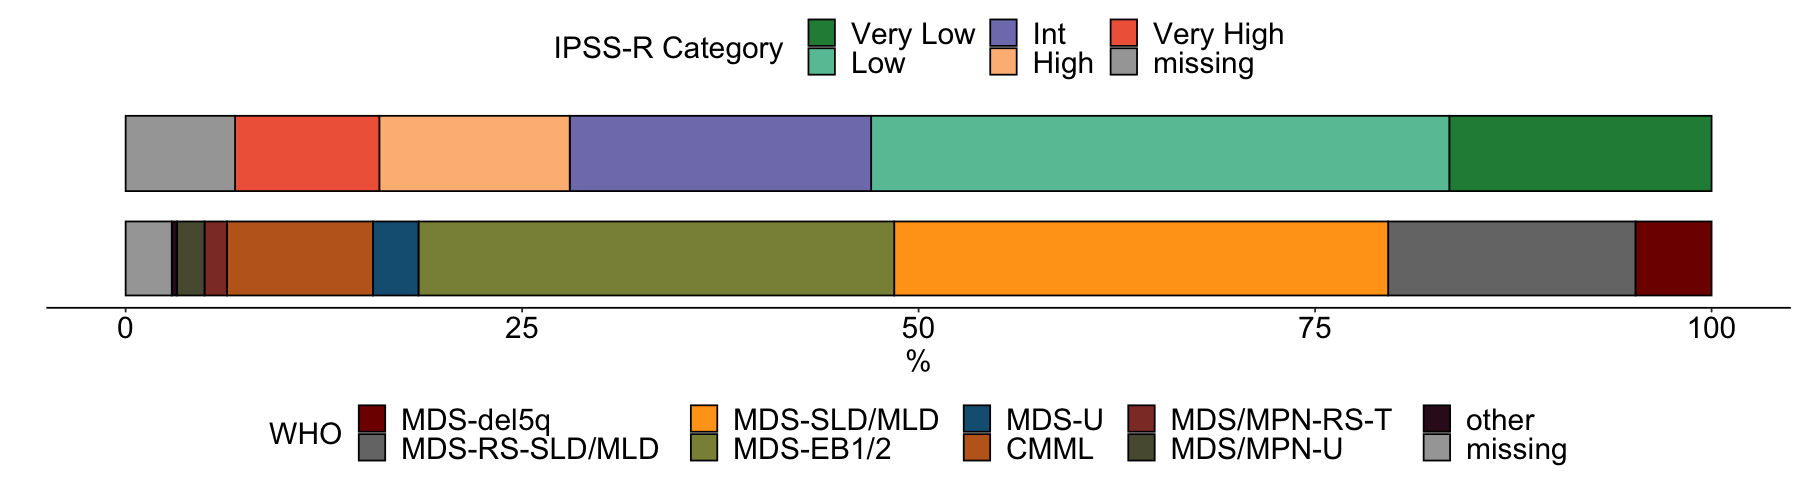

In [523]:
options(repr.plot.width=15, repr.plot.height=2)

dd$who <- dd$WHO_2016
dd$who[dd$who %in% c("MDS-SLD","MDS-MLD")] <- "MDS-SLD/MLD"
dd$who[dd$who %in% c("MDS-RS-SLD","MDS-RS-MLD")] <- "MDS-RS-SLD/MLD"
dd$who[dd$who %in% c("MDS-EB1","MDS-EB2")] <- "MDS-EB1/2"
dd$who[dd$WHO_2016=="aCML"] <- "other"
dd$who <- factor(as.vector(dd$who),levels=c("MDS-del5q",
                                             "MDS-RS-SLD/MLD","MDS-SLD/MLD",
                                              "MDS-EB1/2","MDS-U","CMML","MDS/MPN-RS-T",
                                              "MDS/MPN-U","other"))

gswho <- ggplot(dd, aes(x="", fill=who)) +
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_uchicago(name="WHO", labels=c(levels(dd$who),"missing"), na.value="grey65") + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg

col.ipssr = c("#238b45","#66c2a4","#807dba","#fdbb84","#ef6548")
gsipss <- ggplot(dd, aes(x="", fill=IPSSR)) + 
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_manual(values=col.ipssr,name="IPSS-R Category",
                  labels=c("Very Low","Low","Int","High","Very High","missing"),
                  na.value="grey65"
                  ) + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg


options(repr.plot.width=15, repr.plot.height=4)
giw <- ggarrange(gsipss + theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())+ylab(""),
          NULL,
          gswho + theme(legend.position="bottom"),
          heights=c(1,-0.2,1.12),
          ncol=1)
giw

In [524]:
options(warn=-1)
gage <- ggplot(dd, aes(x="",y=AGE)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
coord_trans(ylim=c(40,100)) + 
ylab("Age in years") + xlab("") + 
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghb <- ggplot(dd, aes(x="",y=HB)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
coord_trans(ylim=c(4,16)) + 
ylab("Hemoglobin in g/dL") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gplt <- ggplot(dd, aes(x="",y=PLT)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
coord_trans(ylim=c(0,500)) + 
ylab("Platelets in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ganc <- ggplot(dd, aes(x="",y=ANC)) +
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
coord_trans(ylim=c(0,7)) + 
ylab("ANC in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gblast <- ggplot(dd, aes(x="",y=BM_BLAST)) +
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg +
stat_compare_means(label.y=20,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(0,20)) +
ylab("Bone marrow blasts in %") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

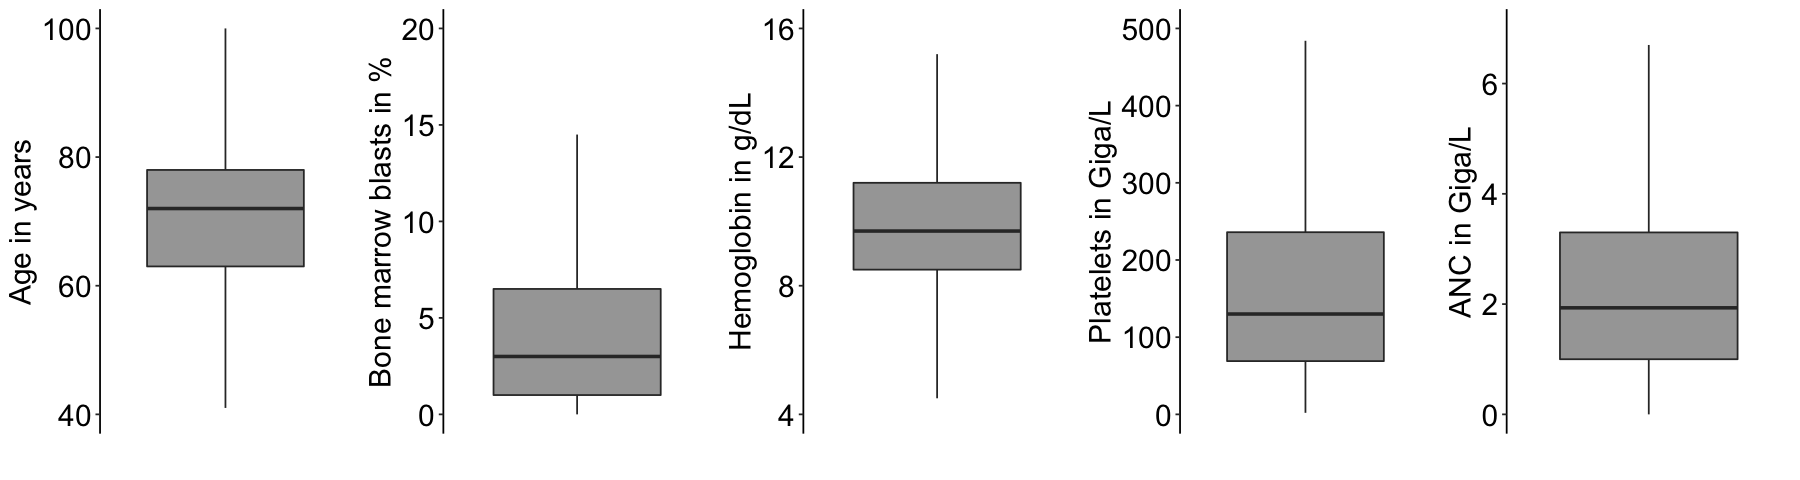

In [525]:
options(repr.plot.width=15, repr.plot.height=4)
gclinical <- ggarrange(gage, gblast, ghb, gplt, ganc, ncol=5)
gclinical

# Figure 1: IWG-PM Molecular Characteristics

## Fig 1A

In [526]:
# Function
mutation_effect <- function(vec_vag_effect) {
    # category
    truncated = c("frameshift_variant","complex_change_in_transcript","initiator_codon_change","splice_site_variant","stop_gained","stop_lost","stop_retained_variant","synonymous_codon")
    # note that the synonymous_codon in the dataset affects TP53 
    # ie p.T125T and have been shown to affect splicing and be truncated-like.
    inframe_indel = c("inframe_codon_gain","inframe_codon_loss","inframe_variant")
    missense = c("non_synonymous_codon","synonymous_codon")
    missense = c(missense,"2KB_upstream_variant","3_prime_UTR_variant") 
    # 2KB_upstream_variant = TERT PROMOTER
    # 3_prime_UTR_variant = TET2 UTR
    itdptd = c("ITD","PTD")
    # res
    res = rep(NA, length(vec_vag_effect))
    res[vec_vag_effect %in% truncated] = "truncated"
    res[vec_vag_effect %in% inframe_indel] = "inframe-indel"
    res[vec_vag_effect %in% missense] = "missense"
    res[vec_vag_effect %in% "ITD"] = "itd"
    res[vec_vag_effect %in% "PTD"] = "ptd"
    res[vec_vag_effect %in% "2KB_upstream_variant"] = "promoter"
    #res[vec_vag_effect %in% "3_prime_UTR_variant"] = "utr"
    res[vec_vag_effect %in% "3_prime_UTR_variant"] = "missense"
    return(res)
}

CreateCombineMaf <- function(ddmaf, ddcyto, complex.vector) {
    mymaf = ddmaf
    # simplified effect
    mymaf$Consequence = mutation_effect(mymaf$EFFECT)
    # multiple hits cases
    mymaf$mkey = paste(mymaf$ID, mymaf$GENE, sep="_")
    im = which(duplicated(mymaf$mkey))
    am = unique(mymaf$mkey[im])
    mymaf[mymaf$mkey %in% am,"Consequence"] = "multiple-mutations"
    mymaf = mymaf[-im,]
    rm(im,am)
    mymaf = mymaf[,c("ID","GENE","PROTEIN_CHANGE","Consequence")]
    mymaf$Type = "Gene"
    colnames(mymaf) = c("ID","Identity","Change","Consequence","Type")
    # ADD CYTO TO MAF
    tmp = ddcyto[,-1]
    tmp$complex = 0
    tmp$complex[which(complex.vector=="complex")] = 1
    rownames(tmp) = ddcyto[,1]
    resf = lapply(rownames(tmp), function(x) {
                      ia = which(tmp[rownames(tmp)==x,]==1)
                      if (length(ia)>0) {
                          ca = colnames(tmp)[ia]
                          return(data.frame(ID=rep(x,length(ca)),
                                            Identity=ca, Change=rep("chromosomal",length(ca)),Consequence=rep("chromosomal",length(ca)),Type="Chromosome"))
                      } else {
                          return(NULL)
                      }
                       })
    mymaf = rbind(mymaf, do.call("rbind",resf))
    mymaf$Consequence2 = mymaf$Consequence
    mymaf$Consequence2[mymaf$Type=="Chromosome" & (grepl("del",mymaf$Alteration)|grepl("plus",mymaf$Alteration))] = "copy-number-change"
    mymaf$Consequence2[mymaf$Type=="Chromosome" & grepl("upd",mymaf$Alteration)] = "copy-neutral-loh"
    mymaf$Consequence2[mymaf$Type=="Chromosome" & grepl("r_",mymaf$Alteration)] = "rearrangement"

    mymaf$Identity = factor(mymaf$Identity, levels=rev(names(sort(table(mymaf$Identity)))))
    mymaf$Consequence = factor(mymaf$Consequence, levels=c("missense","inframe-indel","truncated","multiple-mutations","itd","ptd","promoter","utr","chromosomal"))
    mymaf$Consequence2 = factor(mymaf$Consequence2, levels=c("missense","inframe-indel","truncated","multiple-mutations","itd","ptd","promoter","utr","copy-number-change","copy-neutral-loh","rearrangement","chromosomal"))
    return(mymaf)
}

In [527]:
mymaf = CreateCombineMaf(maf, ddcyto,complex.vector=dd$complex)

In [528]:
allgenes <- colnames(ddmut)[2:127]
allcyto <- colnames(ddcyto)[-1]
allcyto <- allcyto[!allcyto %in% "ring"]
gogenes <- unique(c(allgenes[apply(dd[,allgenes],2,sum)>=10],"MLL","FLT3"))
gocyto <- c("complex",allcyto[apply(dd[dd$complex=="non-complex",allcyto],2,sum)>=10])

In [529]:
tmp <- mymaf
tmp$Consequence <- as.vector(tmp$Consequence)
tmp$Consequence[tmp$Consequence%in%c("itd","ptd")] <- "tandem duplication"
tmp$Consequence <- factor(tmp$Consequence, levels=unique(gsub("ptd","tandem duplication",gsub("itd","tandem duplication",levels(mymaf$Consequence)))))
tmp <- tmp[tmp$Identity %in% c(gogenes,gocyto),]

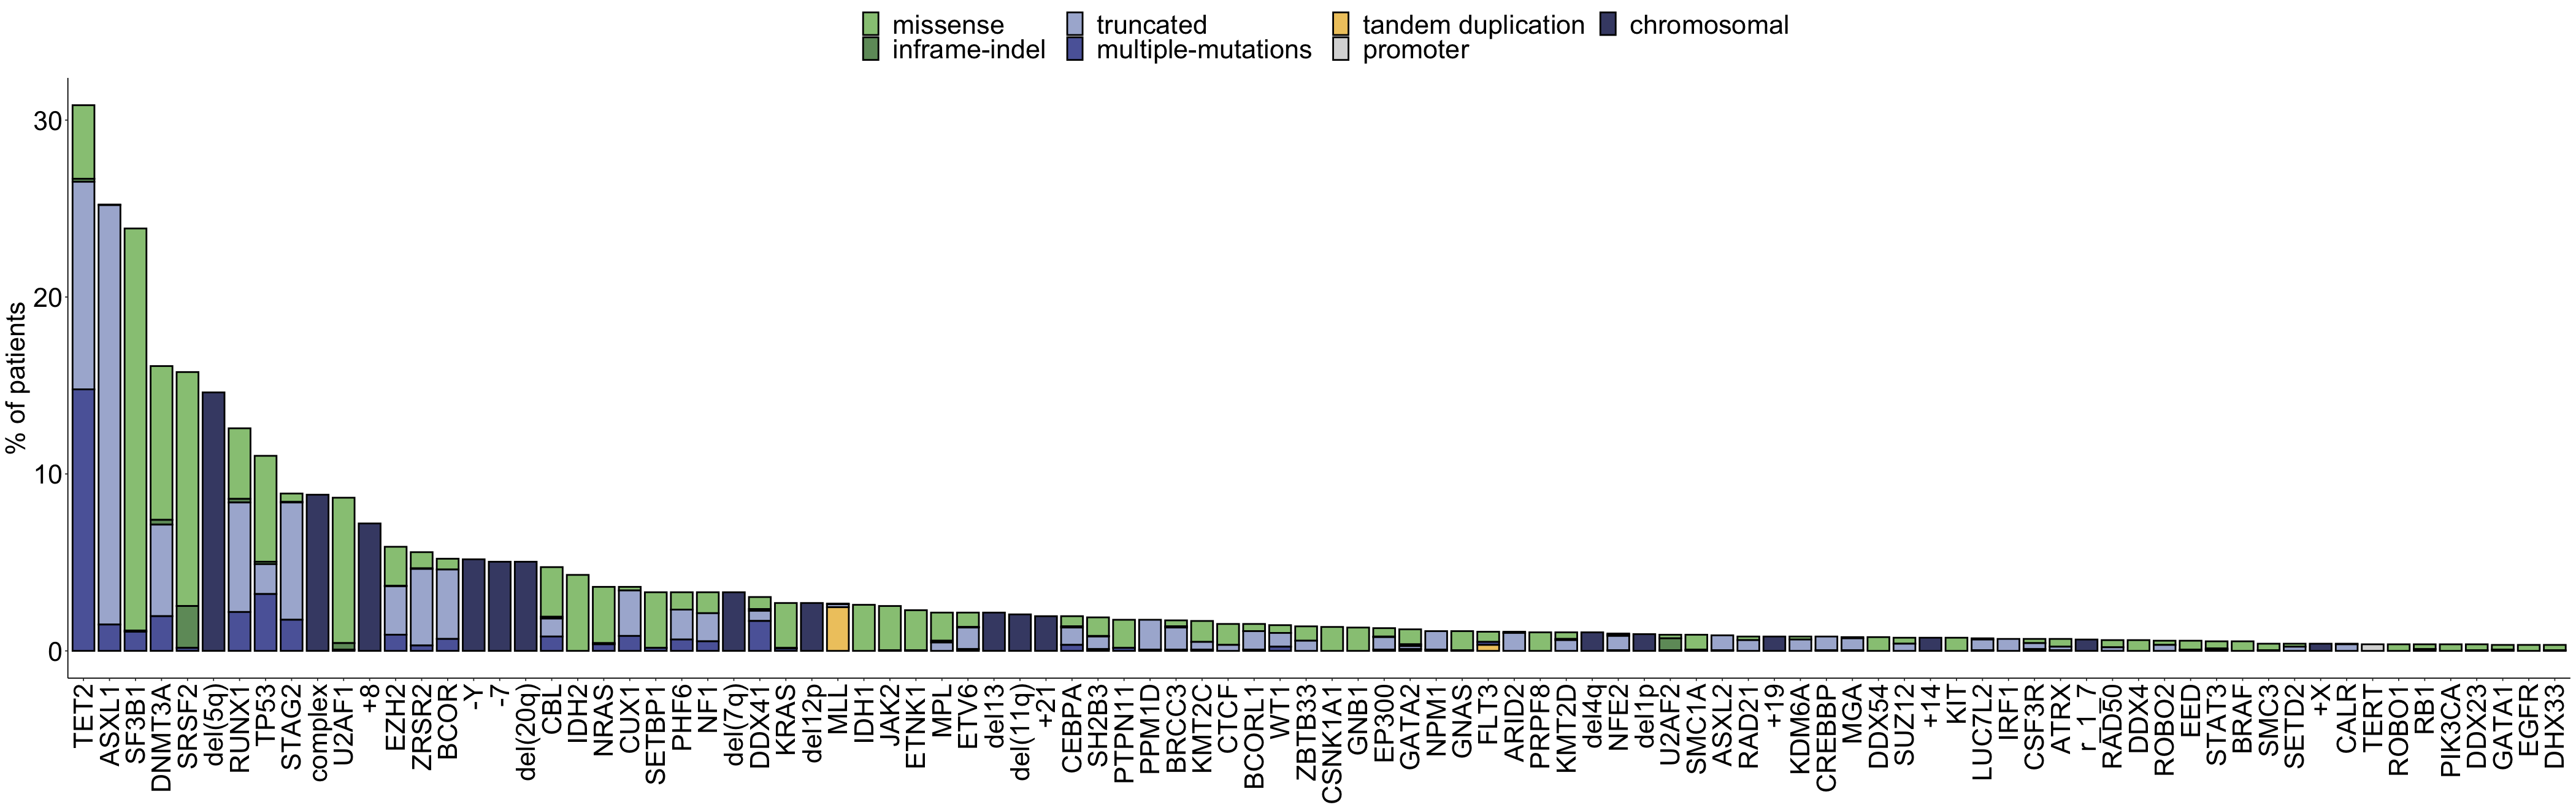

In [530]:
tmp <- mymaf
tmp$Consequence <- as.vector(tmp$Consequence)
tmp$Consequence[tmp$Consequence%in%c("itd","ptd")] <- "tandem duplication"
tmp$Consequence <- factor(tmp$Consequence, levels=unique(gsub("ptd","tandem duplication",gsub("itd","tandem duplication",levels(mymaf$Consequence)))))
tmp <- tmp[tmp$Identity %in% c(gogenes,gocyto),]

lc1 <- levels(tmp$Identity)[levels(tmp$Identity)%in%c(gogenes,gocyto)]
lc11 <- lc1
lc11 <- gsub("del7q","del(7q)",gsub("delY","-Y",gsub("plus","+",gsub("del5q","del(5q)",lc11))))
lc11 <- gsub("del11q","del(11q)",gsub("del7","-7",gsub("del20q","del(20q)",lc11)))

col.fig1a <- met.brewer("Derain")
col.fig1a <- c( col.fig1a[c(2,3,4,6,1)] , "grey85" , col.fig1a[c(7)] )

options(repr.plot.width=35, repr.plot.height=11)
ggplot(tmp) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd)),fill=Consequence), color="black", size=.8, width=.84) +
theme_classic() + gtheme(26) +
topleg + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") +
scale_fill_manual( values=col.fig1a , name="") +
scale_x_discrete(labels=lc11)

## Fig 1B

In [531]:
dd$num_mut <- sapply(dd$ID, function(x) sum(maf$ID==x))
dd$num_cyto <- apply(dd[,allcyto],1,sum)
dd$num_driver <- dd$num_mut + dd$num_cyto

In [532]:
summary(dd$num_mut)
summary(dd$num_driver)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    3.00    3.13    4.00   15.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.136   6.000  20.000 

In [533]:
cc <- 8
dd$range_driver <-  dd$num_driver
dd$range_driver[dd$num_driver>cc] <-  paste0(">",cc)
dd$range_driver <- factor(dd$range_driver, levels=c(0:cc,paste0(">",cc)))

dd$onecase =  sapply(1:nrow(dd), function(i) {
	   x = dd$num_driver[i]
	   res = NA
	   p = dd$ID[i]
	   if (x==1) {
	       res = as.vector(mymaf[mymaf$ID==p,"Identity"])
	   }
	   return(res)
})

aa = dd
a = names(sort(table(dd$onecase),decreasing=T)[1:8])
aa$label = NA
aa$label[!is.na(aa$onecase)] = "other"
aa$label[which(aa$onecase %in% a)] = aa$onecase[which(aa$onecase %in% a)]
aa$label = factor(aa$label, levels=c(a,"other"))
barlev <- gsub("del20q","del(20q)",gsub("delY","-Y",gsub("del5q","del(5q)",levels(aa$label))))

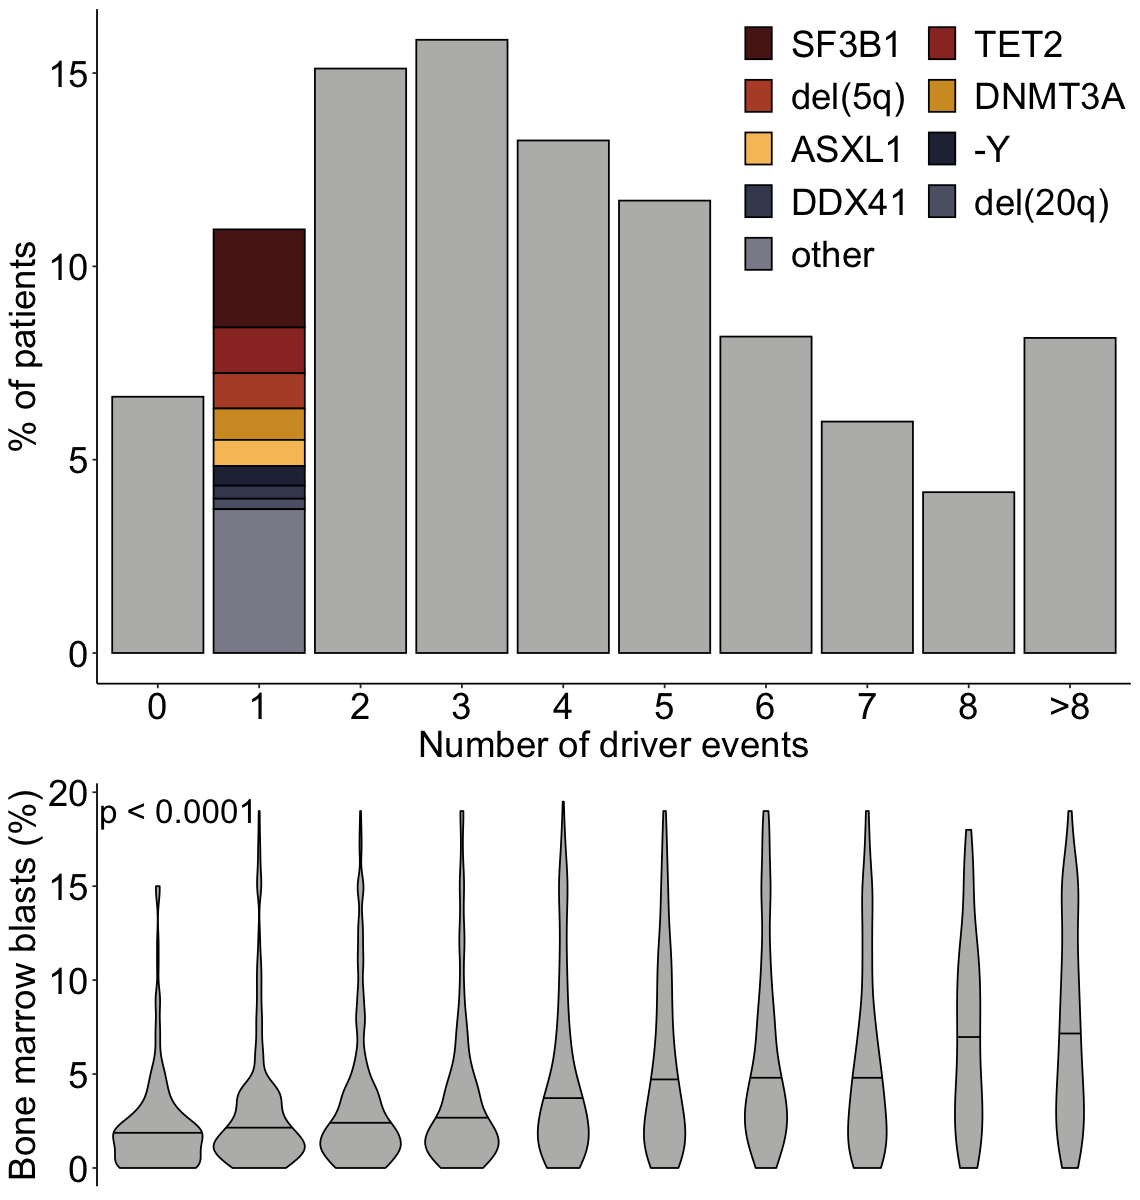

In [534]:
demuth <- met.brewer("Demuth")
col.fig1b <- c(demuth[1:5],demuth[c(10,9,8,7)])

gh0 <- ggplot(aa[!is.na(aa$label),], aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"NA"),
                  na.value=demuth[6]) +  
nolegtitle + xlab("Number of driver events") + 
guides(fill=guide_legend(ncol=2,byrow=TRUE)) + 
theme(legend.position = c(0.8, 0.8)) + nolegtitle

legendh0 <- get_legend(gh0)
histleg <- ggarrange(legendh0)
#histleg

gh <- ggplot(aa, aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"lala"),
                  na.value=demuth[6]) +  
noleg + xlab("Number of driver events")

gb <- ggplot(aa, aes(x=range_driver,y=BM_BLAST)) + 
geom_violin(color="black",draw_quantiles = .5,fill=demuth[6]) + 
theme_classic() + gtheme(22)  + ylab("Bone marrow blasts (%)") + 
#stat_compare_means() +
annotate("text",label=paste0("p"," < ","0.0001"),y=19,x=1.2,size=7) +
nolegtitle + noxtitle +
#scale_y_continuous(breaks=c(0,-5,-10,-15,-20),labels=c(0,5,10,15,20)) +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghh <- ggdraw() +
draw_plot(gh + noleg) +
draw_plot(histleg, x = .58, y = .5, width = .3, height = .4)

options(repr.plot.width=9.5, repr.plot.height=10)
gtwo <- ggarrange(ghh, gb, ncol=1, heights=c(2,1.1))
gtwo

## Fig 1C

In [535]:
cc <- 6
aa$range_driver3 <- as.vector(aa$num_driver)
aa$range_driver3[aa$num_driver>cc] <- paste0(">",cc)
aa$range_driver3[aa$num_driver%in%c(1,2)] <- "1-2"
aa$range_driver3[aa$num_driver%in%c(3,4)] <- "3-4"
aa$range_driver3[aa$num_driver%in%c(5,6)] <- "5-6"
aa$range_driver3[aa$label=="SF3B1"] <- "isolated SF3B1"
aa$range_driver3 <- factor(aa$range_driver3, levels=c("0","isolated SF3B1","1-2","3-4","5-6",paste0(">",cc)))

nncol <- c(
"grey55",
"#3690c0",
"#ccece6",
"#66c2a4",
"#238b45",
"#00441b"    
)

In [536]:
table(aa$range_driver3 , exclude=F)


             0 isolated SF3B1            1-2            3-4            5-6 
           196             75            696            861            588 
            >6 
           541 

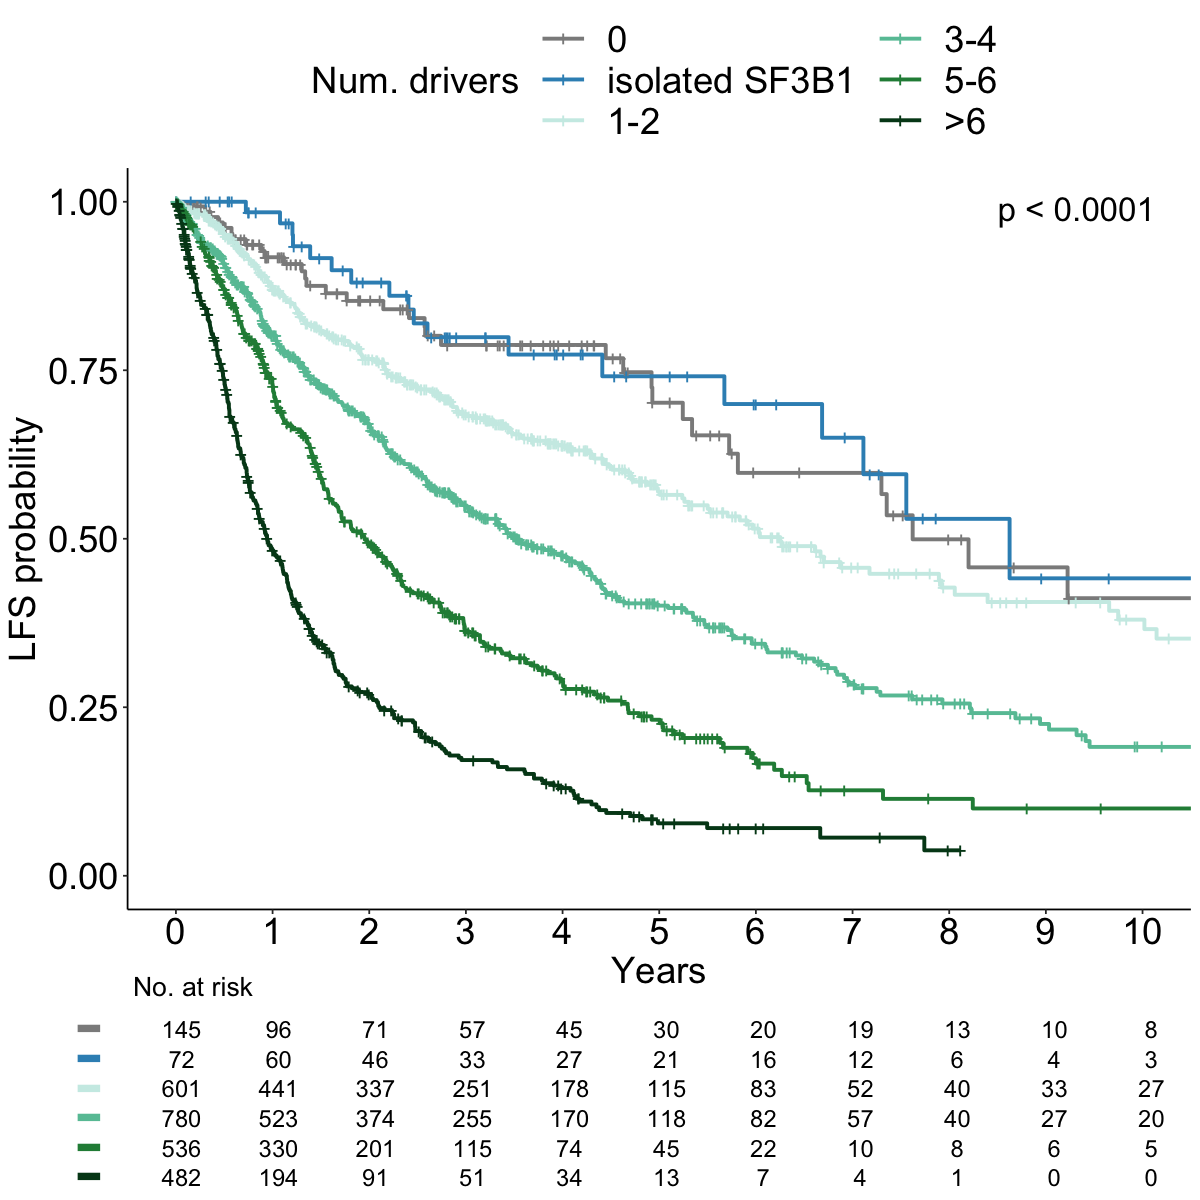

In [537]:
# LFS
look <- "range_driver3"
ff.free = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata)))

gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look,
                   legend.labs=myleg.free, 
                   legend.title="Num. drivers",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=TRUE,
                   #tables.col="look", 
                   tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

options(repr.plot.width=10, repr.plot.height=10)
gfree2 <- ggarrange(gfree, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.6), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))
gfree2

# Figure 2

## Calculate IPSS-M 

The IPSS-M is already provided on the dataframe, with columns:
- *IPSSM*, for the IPSS-M categories
- *IPSSM_SCORE*, for the IPSS-M risk 

However, in this section, we re-calculate it, in order to illustrate how to do it!

In [540]:
path.file <- system.file("extdata", "IPSSMexample.csv", package = "ipssm") 
lala <- IPSSMread(path.file)
colnames(lala)

[1] "Did you make sure that the unit for Hemoglobin (HB) is g per dL."
[1] "Did you make sure that the unit for Platelets (PLT) is Giga per L."
[1] "Did you make sure that the unit for Bone Marrow Blast (BM_BLAST) is percentage."
[1] "Data successfully imported."


[1] "ID"         "HB"         "PLT"        "BM_BLAST"   "del5q"     
 [6] "del7_7q"    "complex"    "CYTO_IPSSR" "del17_17p"  "TP53mut"   
[11] "TP53maxvaf" "TP53loh"    "MLL_PTD"    "FLT3"       "ASXL1"     
[16] "BCOR"       "BCORL1"     "CBL"        "CEBPA"      "DNMT3A"    
[21] "ETV6"       "EZH2"       "IDH1"       "IDH2"       "KRAS"      
[26] "NF1"        "NPM1"       "NRAS"       "RUNX1"      "SETBP1"    
[31] "SF3B1"      "SRSF2"      "STAG2"      "U2AF1"      "ETNK1"     
[36] "GATA2"      "GNB1"       "PHF6"       "PPM1D"      "PRPF8"     
[41] "PTPN11"     "WT1"

In [548]:
# Preparing Input Data
tmp.ipssm <- dd
tmp.ipssm$del7_7q <- as.numeric(tmp.ipssm$del7 | tmp.ipssm$del7q)
tmp.ipssm$del17_17p <- as.numeric(tmp.ipssm$del17 | tmp.ipssm$del17p)
tmp.ipssm$complex <- car::recode(tmp.ipssm$complex, "'complex'='1'; 'non-complex'='0'")
tmp.ipssm$CYTO_IPSSR <- car::recode(tmp.ipssm$CYTO_IPSSR , "'Very-Good'='Very Good' ; 'Int'='Intermediate' ; 'Very-Poor'='Very Poor'")
tmp.ipssm$TP53mut <- as.vector(sapply(dd$ID, function(x) sum(maf$ID==x & maf$GENE=="TP53")))
tmp.ipssm$TP53mut <- car::recode(tmp.ipssm$TP53mut, " '2'='2 or more' ; '3'='2 or more' ")
tmp.ipssm$TP53loh <- 0 ; tmp.ipssm$TP53loh[which(tmp.ipssm$chr17%in%c("cnloh","del"))] <- 1
tmp.ipssm$TP53maxvaf <- NA 
tmp.ipssm$FLT3[which(tmp.ipssm$FLT3_ITD==1)] <- 1
tmp.ipssm <- tmp.ipssm[,colnames(lala)]

# Processing Inout
tmp.process <- IPSSMprocess(tmp.ipssm)
tmp.process[which(tmp.process$ID=="E-H-106249-T1-1-D1-1"),"TP53multi"] <- 0 # just one exeption - erverting back as del17p not at the TP53 locus
# Calculating the IPSSM
tmp.res <- IPSSMmain(tmp.process)

Pre-processing your input data...
Success
Calculating IPSS-M ...
Sucess


In [551]:
table(tmp.res$IPSSMcat_mean, dd$IPSSM) # we re-calculated the IPSS-M indeed

               
                High Low Moderate-High Moderate-Low Very-High Very-Low
  High           379   0             0            0         0        0
  Low              0 889             0            0         0        0
  Moderate High    0   0           281            0         0        0
  Moderate Low     0   0             0          302         0        0
  Very High        0   0             0            0       469        0
  Very Low         0   0             0            0         0      381

In [555]:
dd$IPSSM <- factor(dd$IPSSM, levels=c("Very-Low","Low","Moderate-Low","Moderate-High","High","Very-High"))
table(dd$IPSSM, exclude=F)
summary(dd$IPSSM_SCORE)


     Very-Low           Low  Moderate-Low Moderate-High          High 
          381           889           302           281           379 
    Very-High          <NA> 
          469           256 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-2.87000 -1.16000 -0.38000 -0.00806  0.91000  5.32000      256 

## Fig 2A

In [558]:
gcol <- rev(pal_jama()(5))
gcol <- gcol[c(1,5,3,4,2)]
ggcol <- c(gcol[1:3],pal_jama()(6)[6],gcol[4:5])

In [556]:
tmp = dd[!is.na(dd$IPSSM_SCORE),]
dens <- density(tmp$IPSSM_SCORE)
dens <- data.frame(x=dens$x, y=dens$y)

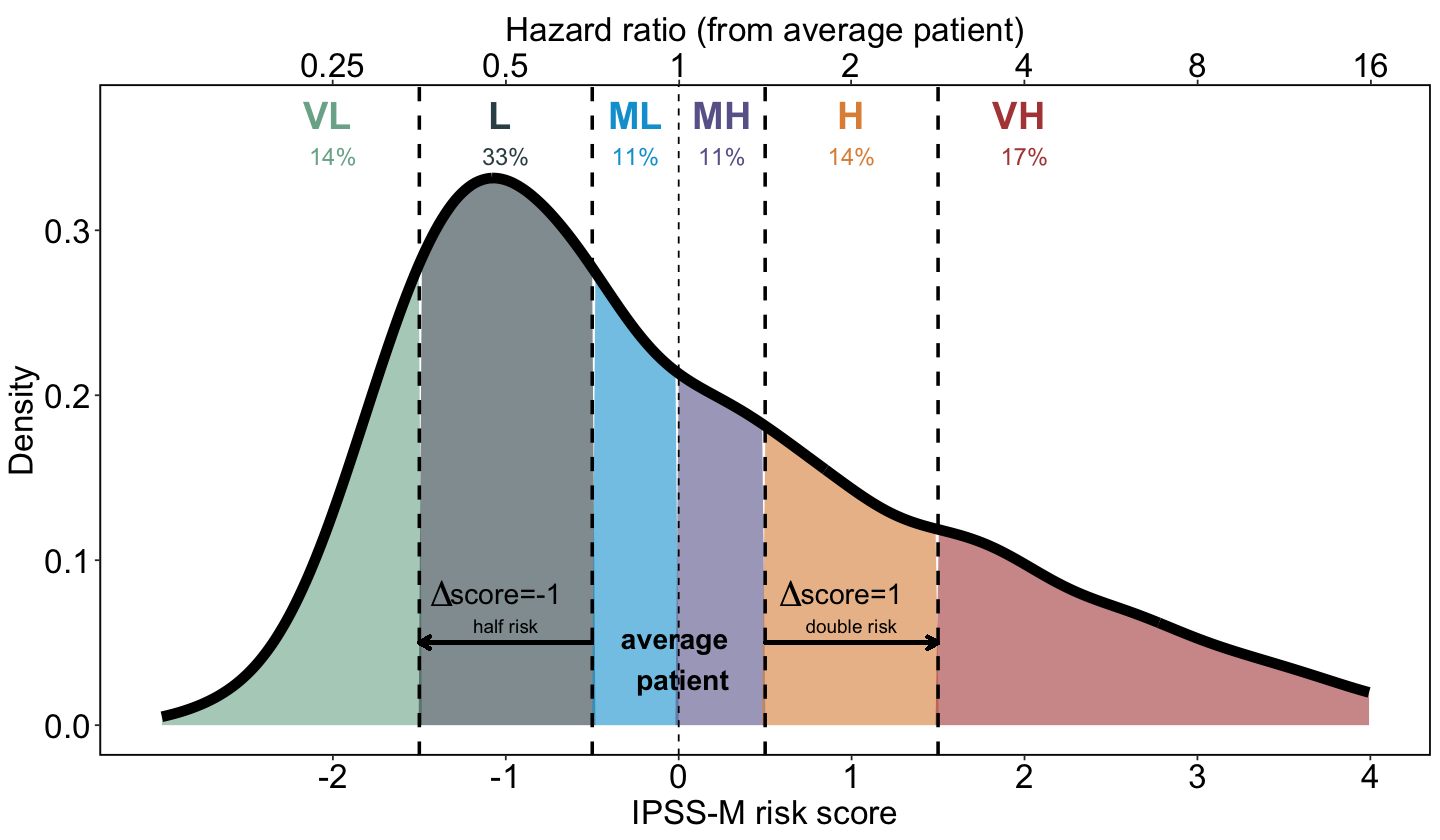

In [560]:
options(repr.plot.width=12, repr.plot.height=7)

cutpoints.center <- c(-1.5,-0.5,0,0.5,1.5)

gscore <- ggplot(dens, aes(x=x,y=y)) + 
theme_bw() +
theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_rect(colour = "black", size=1)) + 
gtheme(20) + 

# highlight the cutoff for categorization
geom_area(mapping = aes(x = x, y=ifelse( (x<=cutpoints.center[1]) , y, 0)), fill = ggcol[1], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[1]&x<=cutpoints.center[2]) , y, 0)), fill = ggcol[2], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[2]&x<=cutpoints.center[3]) , y, 0)), fill = ggcol[3], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[3]&x<=cutpoints.center[4]) , y, 0)), fill = ggcol[4], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[4]&x<=cutpoints.center[5]) , y, 0)), fill = ggcol[5], alpha=.6)+
geom_area(mapping = aes(x = x, y=ifelse( (x>cutpoints.center[5]) , y, 0)), fill = ggcol[6], alpha=.6) +

geom_vline(xintercept = cutpoints.center[-3],col="black",linetype=2,size=1) + 
geom_vline(xintercept = cutpoints.center[3],col="black",linetype=2,size=.5) + 

# plot density
geom_line(size=3) + 
# scaling
scale_x_continuous(breaks=c(-2,-1,0,1,2,3,4),
                   limits = c(-3,4),
                   sec.axis = dup_axis(name="Hazard ratio (from average patient)", 
                                       labels=c(2^-2,2^-1,2^0,2^1,2^2,2^3,2^4))
) +
# labels
xlab("IPSS-M risk score") + ylab("Density") + ylim(c(0,.37)) +
# annotate category
annotate(geom="text",x=-2,y=.37,label=" VL  ",size=8,col=ggcol[1],fontface=2) +
annotate(geom="text",x=-2,y=.345,label="14%",size=5,col=ggcol[1]) +

annotate(geom="text",x=-1,y=.37,label=" L  ",size=8,col=ggcol[2],fontface=2) +
annotate(geom="text",x=-1,y=.345,label="33%",size=5,col=ggcol[2]) +

annotate(geom="text",x=-0.25,y=.37,label=" ML ",size=8,col=ggcol[3],fontface=2) +
annotate(geom="text",x=-0.25,y=.345,label="11%",size=5,col=ggcol[3]) +

annotate(geom="text",x=0.25,y=.37,label=" MH ",size=8,col=ggcol[4],fontface=2) +
annotate(geom="text",x=0.25,y=.345,label="11%",size=5,col=ggcol[4]) +

annotate(geom="text",x=1,y=.37,label=" H ",size=8,col=ggcol[5],fontface=2) +
annotate(geom="text",x=1,y=.345,label="14%",size=5,col=ggcol[5]) +

annotate(geom="text",x=2,y=.37,label=" VH  ",size=8,col=ggcol[6],fontface=2) +
annotate(geom="text",x=2,y=.345,label="17%",size=5,col=ggcol[6]) + 

# annotate interpretation
geom_segment(
    x = 0.5, y = 0.05,
    xend = 1.5, yend = 0.05,
    lineend = "round",linejoin = "round",
    size = 1, 
    arrow = arrow(length = unit(0.1, "inches")),
    colour = "black"
  ) + 
geom_segment(
    x = -0.5, y = 0.05,
    xend = -1.5, yend = 0.05,
    lineend = "round",linejoin = "round",
    size = 1, 
    arrow = arrow(length = unit(0.1, "inches")),
    colour = "black"
  ) + 
annotate(geom="text",x=0,y=.04,label="average \n patient",size=6,col="black", fontface=2) +

annotate(geom="text",x=.65,y=.08,label=c(expression(Delta),""),size=8,col="black")+
annotate(geom="text",x=1,y=.08,label="score=1",size=6,col="black")+
annotate(geom="text",x=1,y=.06,label="double risk",size=4,col="black")+

annotate(geom="text",x=-1.37,y=.08,label=c(expression(Delta),""),size=8,col="black")+
annotate(geom="text",x=-1,y=.08,label="score=-1",size=6,col="black")+
annotate(geom="text",x=-1,y=.06,label="half risk",size=4,col="black")

gscore

## Fig 2B

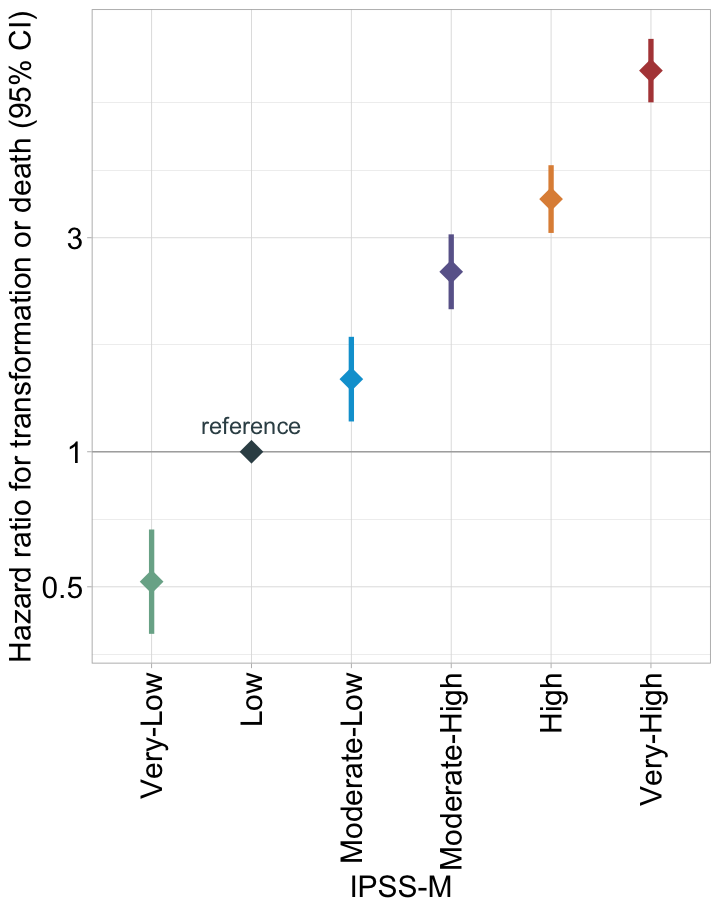

In [567]:
rr <- dd
rr$risk.cat <- factor(rr$IPSSM, levels=c("Low","Very-Low",levels(dd$IPSSM)[3:6])) # make Low the reference level

ff = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","risk.cat"))
c.iwg <- coxph(ff, data=rr) ; c.iwg.free <- c.iwg
zc <- as.data.frame( summary(c.iwg)$conf.int )[,c(1,3,4)] ; colnames(zc) <- c("HR","HRlow95","HRup95")
zc <- rbind(data.frame(HR=1,HRlow95=0,HRup95=0),zc)
zc$category <- levels(rr$risk.cat)
zc$category <- factor(zc$category, levels=levels(dd$IPSSM))
zc$endpoint <- "Leukemia-free survival"

options(repr.plot.width=6, repr.plot.height=7.6)

gvf <- ggplot(zc, aes(x=category,y=HR, ymin=HRlow95,ymax=HRup95,color=category)) +
geom_hline(yintercept=1,color="darkgrey",size=.4) +
geom_pointrange(size=1.5,position = position_dodge(width=.6),shape=18) +
scale_y_log10(breaks=c(0.5,1,3,10,30,100),labels=c(0.5,1,3,10,30,100)) + 
scale_color_manual(values=ggcol) +  scale_fill_manual(values=ggcol) +  
theme_light() + gtheme(18) + 
ylab("Hazard ratio for transformation or death (95% CI)") + xlab("IPSS-M") +
noleg +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
annotate("text",label="reference",x="Low",y=1.15,col=gcol[2],size=5)
gvf

## Fig 2C-2D

In [569]:
## KM CURVES
# LFS
ff.free = as.formula(paste("Surv(LFS_YEARS,LFS_STATUS)~","IPSSM"))
km.free = survfit(ff.free ,data=dd) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub("IPSSM=","",names(km.free$strata))," (",km.free$n,")")
# OS
ff.os = as.formula(paste("Surv(OS_YEARS,OS_STATUS)~","IPSSM"))
km.os = survfit(ff.os ,data=dd) ; km.os$call$formula <- ff.os
myleg.os = paste0(gsub("IPSSM=","",names(km.os$strata))," (",km.os$n,")")

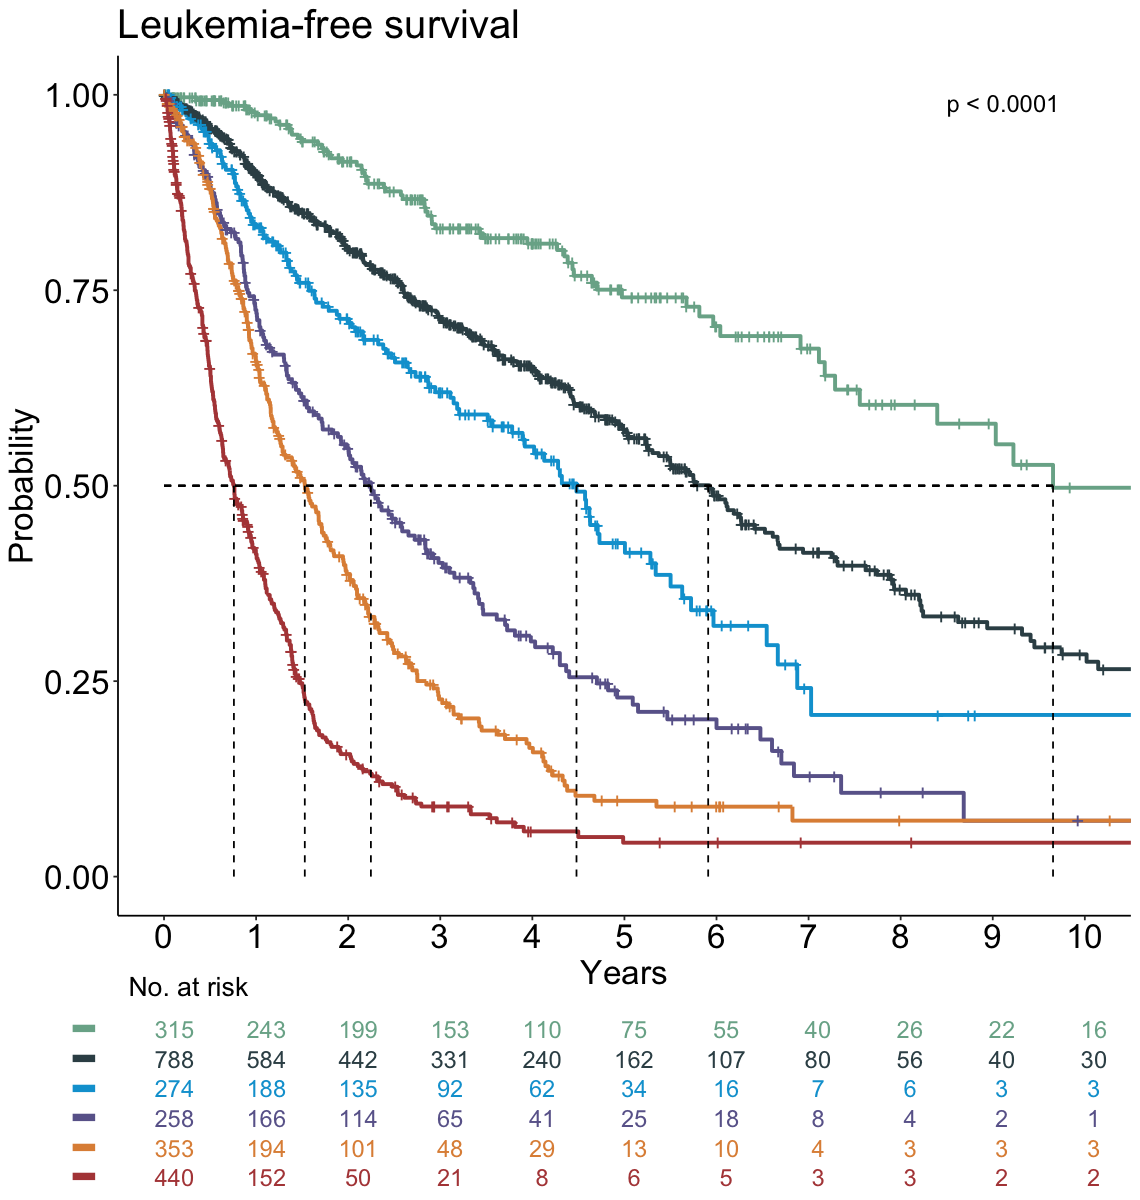

In [575]:
# LFS
gall.free <- ggsurvplot(km.free, data=dd, 
                   color="IPSSM", 
                   #legend.labs=myleg.free, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=5,
                   surv.median.line="hv",
                   palette=ggcol,
                   risk.table=TRUE,
                   tables.col="IPSSM", tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5,
                   title="Leukemia-free survival"
                  )
gfree <- gall.free$plot + theme_classic() + gtheme(20) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("Probability") + 
guides(color = guide_legend(override.aes = list(shape = NA)))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

ggfree <- ggarrange(gfree+noleg, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.5), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

options(repr.plot.width=9.5, repr.plot.height=10)
ggfree

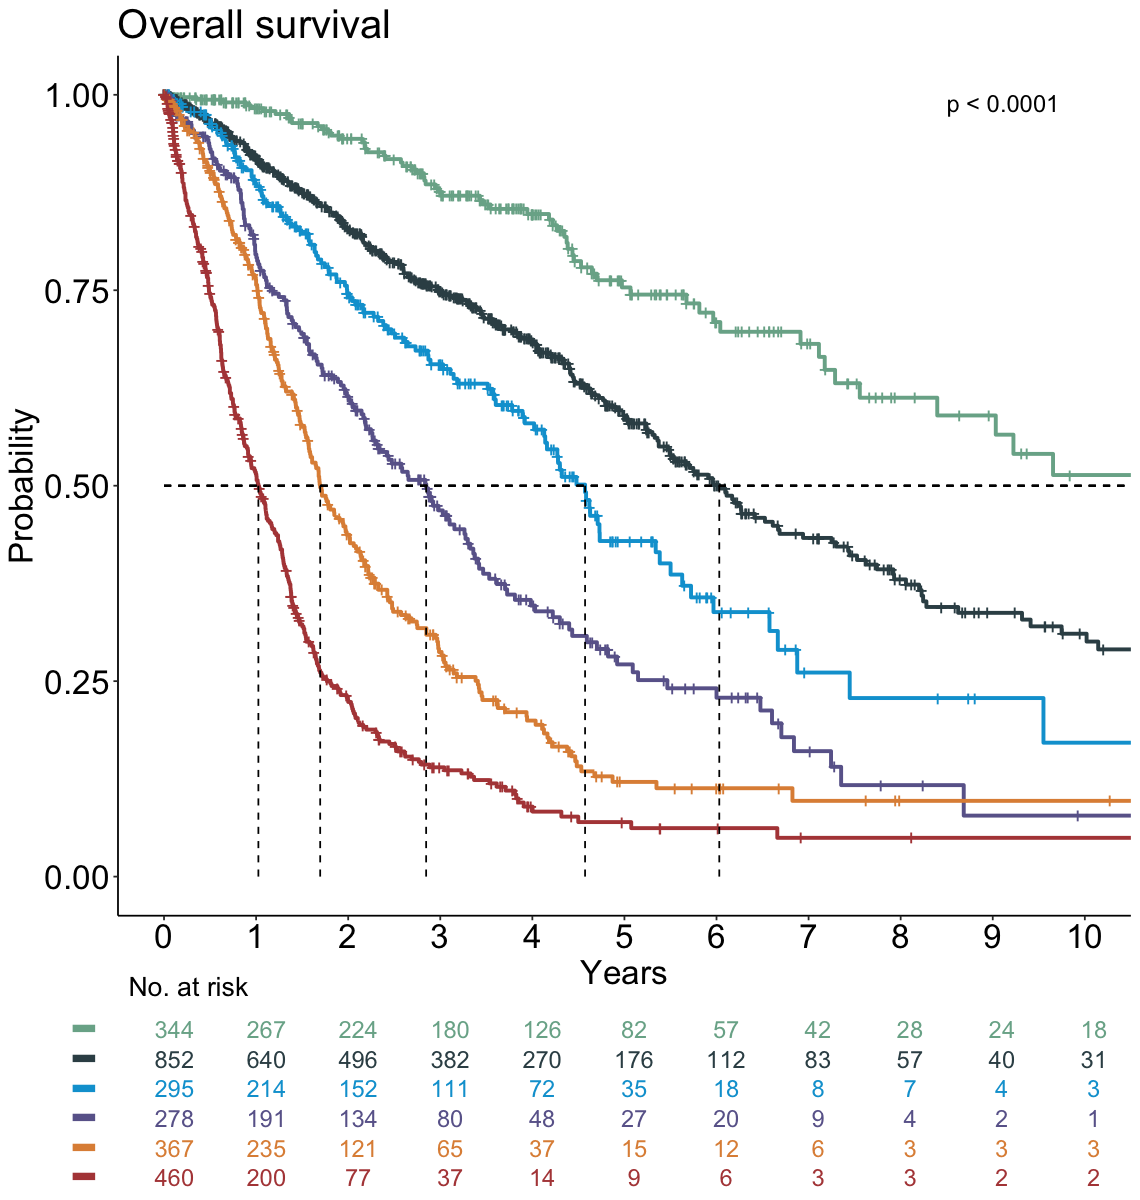

In [577]:
# OS
gall.os <- ggsurvplot(km.os, data=dd, 
                   color="IPSSM", 
                   #legend.labs=myleg.free, 
                   legend.title="IPSS-M",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=5,
                   surv.median.line="hv",
                   palette=ggcol,
                   risk.table=TRUE,
                   tables.col="IPSSM", tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5,
                   title="Overall survival"
                  )
gos <- gall.os$plot + theme_classic() + gtheme(20) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("Probability") + 
guides(color = guide_legend(override.aes = list(shape = NA)))

gtable.os <- gall.os$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

ggos <- ggarrange(gos+noleg, gtable.os+theme(plot.margin = unit(c(-0.5, 0, 0, 1.5), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

options(repr.plot.width=9.5, repr.plot.height=10)
ggos

## Fig 2E

In [580]:
# Prepare for Competing Risk Analysis:
dd$comp_sample_years = pmin(dd$OS_YEARS, dd$AMLt_YEARS)
dd$comp_status = "censor"
dd$comp_status[which(dd$OS_STATUS==1)] = "death"
dd$comp_status[which(dd$AMLt_STATUS==1)] = "aml"
i <- which(is.na(dd$comp_sample_years) & !is.na(dd$comp_status))
dd$comp_status[i] <- NA
dd$comp_status = factor(dd$comp_status, levels=c("censor","aml","death"))
table(dd$comp_status,exclude=F)


censor    aml  death   <NA> 
  1264    409    936    348 

In [582]:
get_df_cif <- function(cmfit, vec.time=seq(0,6,0.05)) {
    fit <- timepoints(cmfit, vec.time)
    # estimates
    t.est <- as.data.frame(t(fit$est))
    t.est$time <- as.numeric(rownames(t.est))
    u.est.aml <- pivot_longer(data=t.est, cols=contains("aml"), names_to = "strata", values_to = "est_aml",)
    u.est.death <- pivot_longer(data=t.est, cols=contains("death"), names_to = "strata", values_to = "est_death",)
    # variance
    t.var <- as.data.frame(t(fit$var))
    t.var$time <- as.numeric(rownames(t.var))
    u.var.aml <- pivot_longer(data=t.var, cols=contains("aml"), names_to = "strata", values_to = "var_aml",)
    u.var.death <- pivot_longer(data=t.var, cols=contains("death"), names_to = "strata", values_to = "var_death",)

    # build df
    df <- cbind( u.est.aml[,c("time","est_aml","strata")] , u.est.death[,c("est_death")] ,
                 u.var.aml[,c("var_aml")] ,  u.var.death[,c("var_death")]
               )
    df$strata <- gsub(" death","",gsub(" aml","",df$strata) )

    df$lower_aml <- df$est_aml - 1.96*sqrt(df$var_aml)
    df$upper_aml <- df$est_aml + 1.96*sqrt(df$var_aml)
    
    df$lower_death <- df$est_death - 1.96*sqrt(df$var_death)
    df$upper_death <- df$est_death + 1.96*sqrt(df$var_death)
    
    return(df)
}

In [584]:
# CAUSE DEATH WITH AML || DEATH WITHOUT AML
tmp <- dd
# CAUSE SPECIFIC: AML-t || DEATH WITHOUT AML
tmp$status1 <- car::recode(as.vector(tmp$comp_status),"'death'='death_without'")
tmp$time1 <- tmp$comp_sample_years
# CAUSE SPECIFIC: DEATH WITH AML || DEATH WITHOUT AML
tmp$status2 <-  "censor"
tmp$status2[tmp$OS_STATUS==1 & tmp$AMLt_STATUS==1] <- "d_with_aml" # death with aml
tmp$status2[tmp$OS_STATUS==1 & tmp$AMLt_STATUS==0] <- "death_without" # death without aml
tmp$time2 <- tmp$OS_YEARS
i <- which( is.na(tmp$AMLt_YEARS) | is.na(tmp$AMLt_STATUS) )
tmp$time2[i] <- NA ; tmp$status2[i] <- NA
tmp$status2[which(is.na(tmp$time2))] <- NA

table(tmp$status1, tmp$status2,exclude=F)

               
                censor d_with_aml death_without <NA>
  aml               62        347             0    0
  censor          1264          0             0    0
  death_without      0          0           936    0
  <NA>               0          0             0  348

In [590]:
cmfit1 = with(tmp,cuminc(time1,status1,IPSSM,cencode="censor"))
rr1 = get_df_cif(cmfit=cmfit1, vec.time = seq(0, 10, 0.05))
colnames(rr1) <- gsub("death","death_without",colnames(rr1))

cmfit2 = with(tmp,cuminc(time2,status2,IPSSM,cencode="censor"))
rr2 = get_df_cif(cmfit=cmfit2, vec.time = seq(0, 10, 0.05))
colnames(rr2) <- gsub("death","death_without",colnames(rr2))
colnames(rr2) <- gsub("aml","death_with",colnames(rr2))

rr3 <- cbind(rr1, rr2[,colnames(rr2)[!grepl("out",colnames(rr2))&grepl("death_with",colnames(rr2))]])
rr3$est_minus_os <- rr3$est_death_with + rr3$est_death_without
rr3$est_minus_lfs <- rr3$est_aml + rr3$est_death_without

536 cases omitted due to missing values
536 cases omitted due to missing values


In [604]:
rr3.long <- pivot_longer(rr3[,c("time","strata",colnames(rr3)[grepl("est",colnames(rr3))])], 
                         cols = starts_with("est"))
rr3.long$strata <- factor(rr3.long$strata, levels=levels(tmp$IPSSM))
rr3.long$name <- factor(rr3.long$name, 
                        levels=c("est_aml","est_death_with","est_death_without","est_minus_os","est_minus_lfs"))

In [605]:
casatt <- met.brewer("Cassatt2")
col.fig2e <- c(casatt[1],casatt[3],casatt[7],casatt[8],casatt[10])

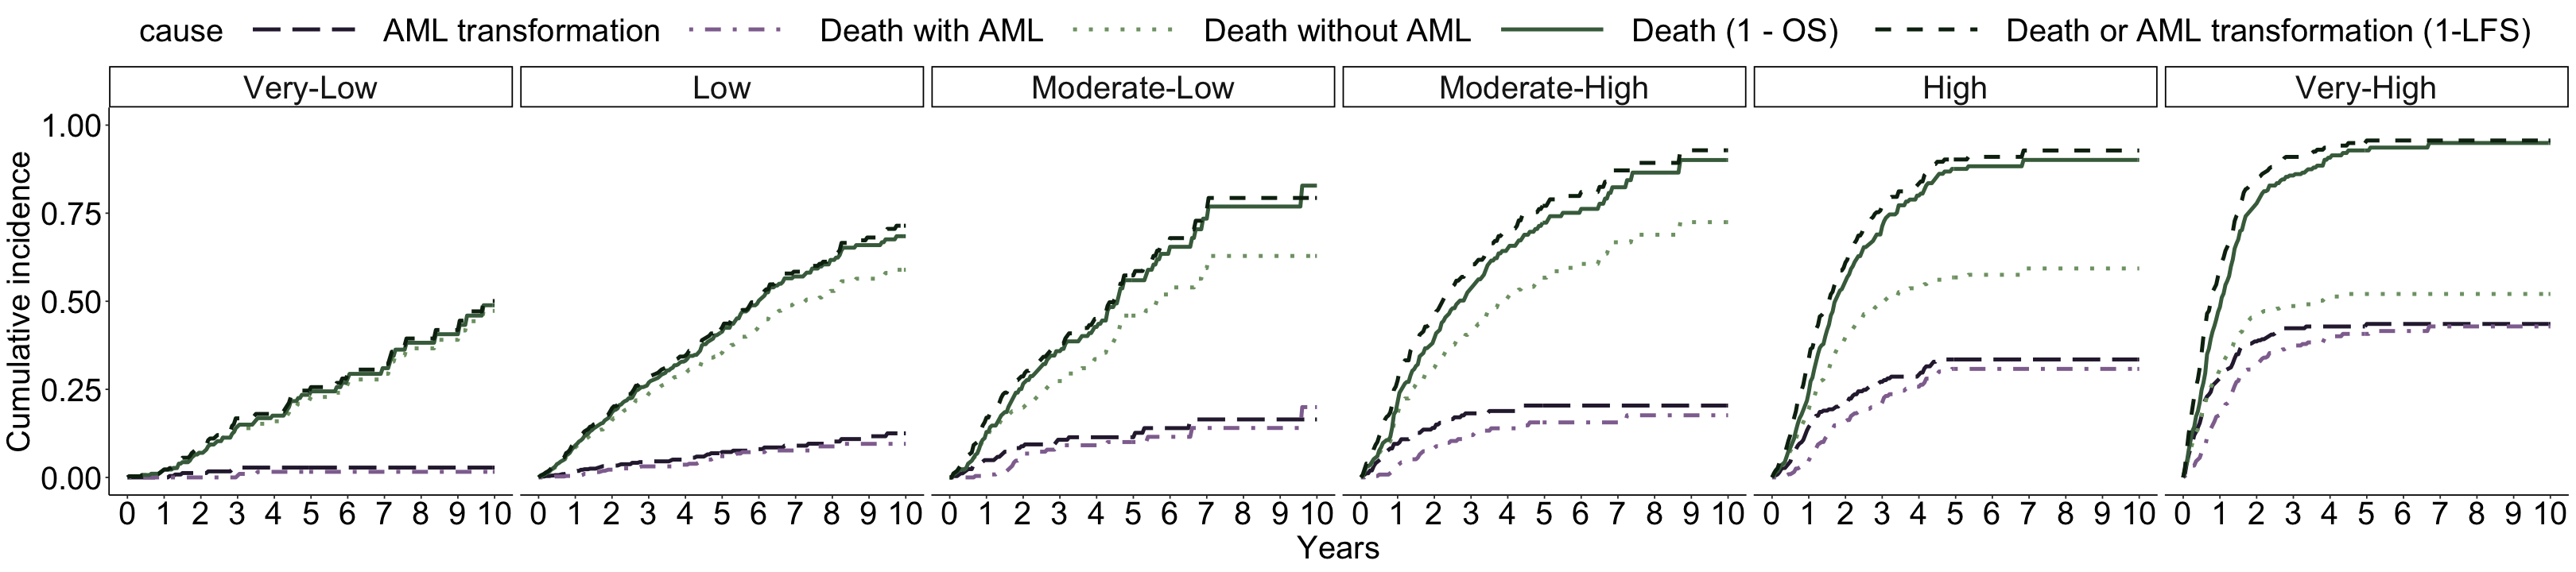

In [606]:
options(repr.plot.width=27, repr.plot.height=6)

gcif2e <- ggplot(data = rr3.long, aes(x = time, y = value, linetype = name, color=name)) +
       geom_line(size=1.4) +  
       scale_x_continuous(breaks=0:10) + ylim(c(0,1)) + 
theme_classic() + gtheme(24) + topleg + 
xlab("Years") + ylab("Cumulative incidence") + facet_grid(.~strata)  +
scale_color_manual(values=col.fig2e,
                   name="cause",
                   labels=c("AML transformation","Death with AML","Death without AML",
                            "Death (1 - OS)","Death or AML transformation (1-LFS)")) +
scale_linetype_manual(values=c("longdash","dotdash","dotted"
                               ,"solid","dashed"),
                   name="cause",
                   labels=c("AML transformation","Death with AML","Death without AML",
                            "Death (1 - OS)","Death or AML transformation (1-LFS)")) +
theme(legend.key.width = unit(3.4,"cm"))

gcif2e 

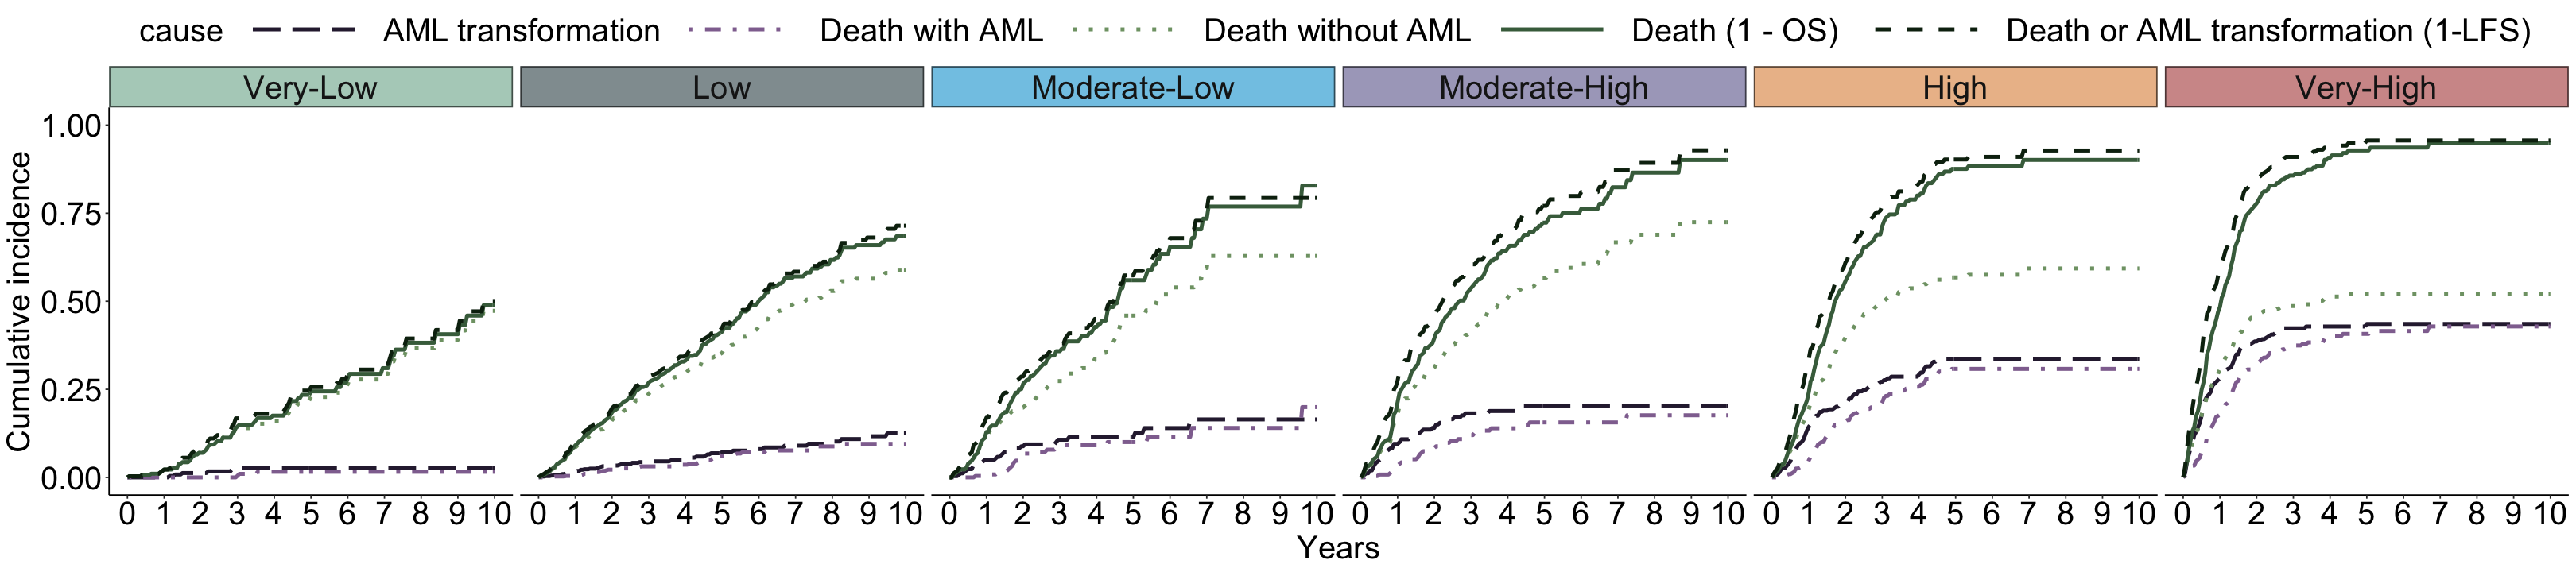

In [607]:
g <- ggplot_gtable(ggplot_build(gcif2e))
strips <- which(grepl('strip-', g$layout$name))
pal <- brewer.pal(8, "Paired")
for (i in seq_along(strips)) {
  k <- which(grepl('rect', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  #l <- which(grepl('titleGrob', g$grobs[[strips[i]]]$grobs[[1]]$childrenOrder))
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$fill <- ggcol[i]
  g$grobs[[strips[i]]]$grobs[[1]]$children[[k]]$gp$alpha <- .6
}
plot(g)

# Sources

In [1]:
library("tidyr")
library("ggforestplot")
get_df_cif <- function(cmfit, vec.time=seq(0,6,0.05)) {
    fit <- timepoints(cmfit, vec.time)
    # estimates
    t.est <- as.data.frame(t(fit$est))
    t.est$time <- as.numeric(rownames(t.est))
    u.est.aml <- pivot_longer(data=t.est, cols=contains("aml"), names_to = "strata", values_to = "est_aml",)
    u.est.death <- pivot_longer(data=t.est, cols=contains("death"), names_to = "strata", values_to = "est_death",)
    # variance
    t.var <- as.data.frame(t(fit$var))
    t.var$time <- as.numeric(rownames(t.var))
    u.var.aml <- pivot_longer(data=t.var, cols=contains("aml"), names_to = "strata", values_to = "var_aml",)
    u.var.death <- pivot_longer(data=t.var, cols=contains("death"), names_to = "strata", values_to = "var_death",)
    
    #print( identical(u.est.aml$time, u.var.aml$time) )
    #print( identical(u.est.aml$strata, u.var.aml$strata) )
    #print( identical(u.est.death$strata, u.var.death$strata) )

    # build df
    df <- cbind( u.est.aml[,c("time","est_aml","strata")] , u.est.death[,c("est_death")] ,
                 u.var.aml[,c("var_aml")] ,  u.var.death[,c("var_death")]
               )
    df$strata <- gsub(" death","",gsub(" aml","",df$strata) )

    df$lower_aml <- df$est_aml - 1.96*sqrt(df$var_aml)
    df$upper_aml <- df$est_aml + 1.96*sqrt(df$var_aml)
    
    df$lower_death <- df$est_death - 1.96*sqrt(df$var_death)
    df$upper_death <- df$est_death + 1.96*sqrt(df$var_death)
    
    return(df)
}

Warning message:
“package ‘tidyr’ was built under R version 3.6.2”


In [2]:
system("mkdir -p figures")
system("mkdir -p figures/vi")

In [44]:
library("ggplot2")
library("MetBrewer")
theme.square <- theme_bw() +
theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_rect(colour = "black", size=1))

# IWG cohort

In [4]:
source("GetReady.R")

[1] "sourcing functions...."


Warning message:
“package ‘reshape2’ was built under R version 3.6.2”

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“package ‘DescTools’ was built under R version 3.6.2”
Warning message:
“package ‘survival’ was built under R version 3.6.2”
Loading required package: ggpubr

Warning message:
“package ‘ggpubr’ was built under R version 3.6.2”


[1] "done"
[1] "loading dataframes and checking ids...."
[1] "all good"
[1] "all good ^ 2"
[1] "all good ^ 3"
[1] "done"

Dataframes Names are:
    dc
    ddcyto 
    ddmut 
    ffmut
    dd
    data 
    ddmaf
    mymaf
    
 Some new variables names are:
    number_driver_mutation
    number_genes_mutated
    number_cna_alteration 
    number_upd_alteration 
    number_chr_alteration
    number_driver_alteration 

    
Also added:
    dd$IPSSR_SCORE
    dd$CAT_BMBLAST etc
    dd$myipssr 
    col.ipssr
    col.who 

    
Class Dataframe is:
    ddclass
    

In [5]:
i <- which(is.na(dd$free_os_sample_years) & !is.na(dd$free_os_status))
dd$free_os_status[i] <- NA
j <- which(is.na(dd$aml_sample_years) & !is.na(dd$aml_status))
dd$aml_status[j] <- NA
k <- which(is.na(dd$os_sample_years) & !is.na(dd$os_status))
dd$os_status[k] <- NA

i <- which(!is.na(dd$free_os_sample_years) & is.na(dd$free_os_status))
dd$free_os_sample_years[i] <- NA
j <- which(!is.na(dd$aml_sample_years) & is.na(dd$aml_status))
dd$aml_sample_years[j] <- NA
k <- which(!is.na(dd$os_sample_years) & is.na(dd$os_status))
dd$os_sample_years[k] <- NA

dd$comp_sample_years = pmin(dd$os_sample_years, dd$aml_sample_years)
dd$comp_status = "censor"
dd$comp_status[which(dd$os_status==1)] = "death"
dd$comp_status[which(dd$aml_status==1)] = "aml"
i <- which(is.na(dd$comp_sample_years) & !is.na(dd$comp_status))
dd$comp_status[i] <- NA
dd$comp_status = factor(dd$comp_status, levels=c("censor","aml","death"))
table(dd$comp_status,exclude=F)


censor    aml  death   <NA> 
  1315    453   1017    538 

In [6]:
# WE SHOULD CLEAN FOR THE FEW CASES WITH DIFFERENT FU FOR AML AND DEATH
# IN THE CONSTRUCTION OF LFS OR COMPETING RISKS !!
# cases with different follow-up for death and aml
#j <- which(tmp$os_status==1 & tmp$aml_status==0 & tmp$os_sample_years>tmp$aml_sample_years)
#tmp$status[j] <- "censor"
#tmp$time[j] <- tmp$aml_sample_years[j]

In [7]:
# Some Calculation
genes.main <- c("SF3B1_alpha","SF3B1_5q","ASXL1","SRSF2","DNMT3A","RUNX1","STAG2","U2AF1","EZH2","BCOR","CBL","NRAS","IDH2","NF1","KRAS","SETBP1","MLL_PTD","ETV6","CEBPA","NPM1","TP53multi","FLT3all")
genes.res <- c("PTPN11","GATA2","PRPF8","BCORL1","ETNK1","PPM1D","PHF6","WT1","IDH1","GNB1","CSF3R","ATRX","U2AF2","SUZ12","CREBBP","ASXL2","LUC7L2")

dd$Nres <- apply( ddmut[,genes.res], 1, sum )
dd$Nres2 <- pmin(dd$Nres,2) # ceiling at 2
dd$TRANSF_PLT100 <- pmin(dd$PLT,250)/100 # ceiling at 250
dd$FLT3all <- dd$FLT3_ITD ; dd$FLT3all[dd$FLT3==1] = 1

dd$is_complex <- 0 ; dd$is_complex[which(dd$complex=="complex")] <- 1
dd$is_male <- 0 ; dd$is_male[which(dd$SEX=="M")] <- 1
dd$not_denovo <- 0
dd$not_denovo[which(dd$MDS_TYPE%in%c("secondary","therapy_related"))] <- 1 # quite an approximation for the missing mds type data

In [8]:
li1 <- levels(dd$IPSSR_CALCULATED)
li2 <- c("Very Low","Low","Intermediate","High","Very High")
li3 <- c("VL","L","Int","H","VH")
dd$IPSSR_1 <- dd$IPSSR_CALCULATED
dd$IPSSR_2 <- car:::recode(dd$IPSSR_1,
                           "'VERY-LOW'='Very Low'; 'LOW'='Low'; 'INT'='Intermediate'; 'HIGH'='High'; 'VERY-HIGH'='Very High'")
dd$IPSSR_2 <- factor(dd$IPSSR_2, levels=li2)
dd$IPSSR_3 <- car:::recode(dd$IPSSR_1,
                           "'VERY-LOW'='VL'; 'LOW'='L'; 'INT'='Int'; 'HIGH'='H'; 'VERY-HIGH'='VH'")
dd$IPSSR_3 <- factor(dd$IPSSR_3, levels=li3)

dd$IPSSR <- dd$IPSSR_3

In [9]:
# "restrict datasets"
# i.e. WBC<13 and Blast<30%
i.restrict <- which( dd$WBC>13 | dd$ANC>13 | dd$BM_BLAST>30 | dd$PB_BLAST>30 | dd$WHO_2016=="AML-t33" )
dd.restrict <- dd[-i.restrict,]
dd.restrict.free <- dd.restrict[!grepl("AML",dd.restrict$WHO_2016) , ]

In [10]:
dscore <- read.table(file="res_prognosis_model/viii5/df_score.tsv", sep="\t", header=T, stringsAsFactors = F)

In [11]:
identical(dd.restrict.free$LEUKID, dscore$LEUKID)
dim(dscore)
#dim(dd.restrict.free)

[1] TRUE

[1] 2957   28

# Clinical Characteristics

In [12]:
table(dd.restrict.free$WHO_2016_SIMPLIFY_2,exclude=F)
table(dd.restrict.free$IPSSR,exclude=F)


          aCML           CMML      MDS-del5q      MDS-EB1/2 MDS-RS-SLD/MLD 
             5            272            142            887            461 
   MDS-SLD/MLD          MDS-U   MDS/MPN-RS-T      MDS/MPN-U          other 
           921             85             42             51              5 
          <NA> 
            86 


  VL    L  Int    H   VH <NA> 
 489 1078  562  355  269  204 

In [13]:
options(warn=-1)
gage <- ggplot(dd.restrict.free, aes(x="",y=AGE)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
#stat_compare_means(label.y=16,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(40,100)) + 
ylab("Age in years") + xlab("") + 
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghb <- ggplot(dd.restrict.free, aes(x="",y=HB)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
#stat_compare_means(label.y=16,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(4,16)) + 
ylab("Hemoglobin in g/dL") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gplt <- ggplot(dd.restrict.free, aes(x="",y=PLT)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18)+ noleg + 
#stat_compare_means(label.y=700,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(0,500)) + 
ylab("Platelets in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ganc <- ggplot(dd.restrict.free, aes(x="",y=ANC)) +
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
#stat_compare_means(label.y=700,comparisons=list(c(1,2)),label="p.signif",tip.length=0) +
coord_trans(ylim=c(0,7)) + 
ylab("ANC in Giga/L") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

gblast <- ggplot(dd.restrict.free, aes(x="",y=BM_BLAST)) + 
geom_boxplot(outlier.shape=NA, fill="grey65") +
theme_classic() + gtheme(18) + noleg + 
stat_compare_means(label.y=20,comparisons=list(c(1,2)),label="p.signif",tip.length=0) + 
coord_trans(ylim=c(0,20)) + 
ylab("Bone marrow blasts in %") + xlab("") +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

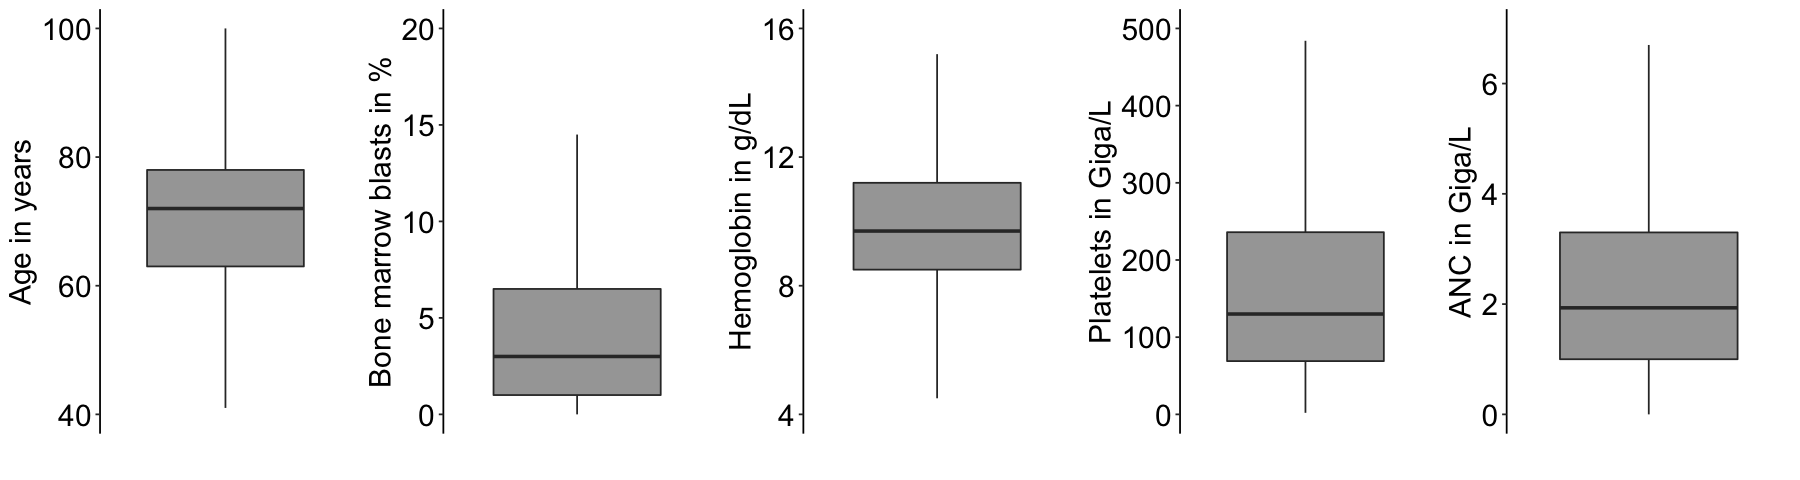

In [15]:
options(repr.plot.width=15, repr.plot.height=4)
gclinical <- ggarrange(gage, gblast, ghb, gplt, ganc, ncol=5)
gclinical
ggsave(gclinical, file="figures/vi/outline/clinical.pdf",width=15, height=4)
ggsave(gclinical, file="figures/vi/outline/clinical.png",width=15, height=4)

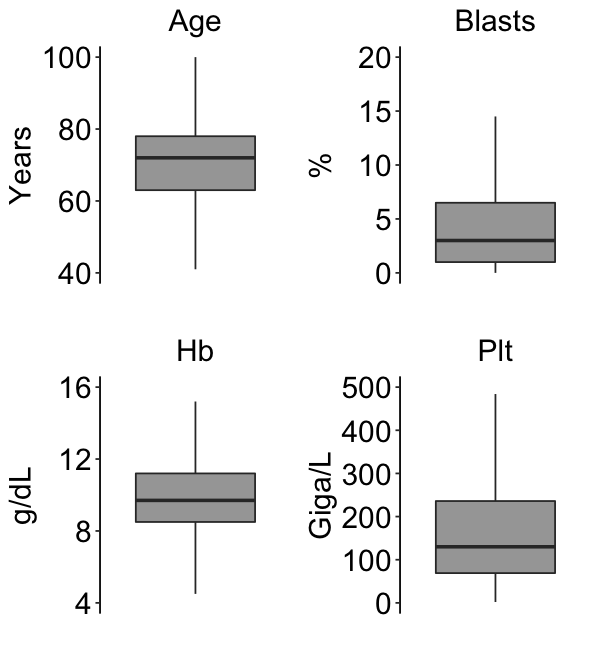

In [17]:
options(repr.plot.width=5, repr.plot.height=5.5)

gclinical2 <- ggarrange(gage+ggtitle("Age")+ylab("Years")+theme(plot.title = element_text(size=18,hjust = 0.5)),
          gblast+ggtitle("Blasts")+ylab("%")+theme(plot.title = element_text(size=18,hjust = 0.5)) +
          scale_y_continuous(labels=c("  0","  5","  10","  15","  20")),
          ghb+ggtitle("Hb")+ylab("g/dL")+theme(plot.title = element_text(size=18,hjust = 0.5)) +
          scale_y_continuous(labels=c("  4","  8","  12","  16")),
          gplt+ggtitle("Plt")+ylab("Giga/L")+theme(plot.title = element_text(size=18,hjust = 0.5)),
          nrow=2,ncol=2)

gclinical2
ggsave(gclinical2, file="figures/vi/outline/clinical2.pdf",width=5, height=5.5)
ggsave(gclinical2, file="figures/vi/outline/clinical2.png",width=5, height=5.5)

In [18]:
options(repr.plot.width=15, repr.plot.height=2)

gscyto <- ggplot(dd.restrict.free, aes(x="", fill=CYTO_IPSSR)) + 
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_manual(values=col.ipssr,name="IPSS-R Cytogenetic",
                  labels=c("Very Good","Good","Int","Poor","Very Poor","missing"),
                  na.value="grey65"
                 ) + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg

#gscyto

ggsave(gscyto, file="figures/vi/outline/cyto.pdf",width=15, height=2)
ggsave(gscyto, file="figures/vi/outline/cyto.png",width=15, height=2)

In [19]:
options(repr.plot.width=15, repr.plot.height=2)

gsipss <- ggplot(dd.restrict.free, aes(x="", fill=IPSSR_2)) + 
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_manual(values=col.ipssr,name="IPSS-R Category",
                  labels=c("Very Low","Low","Int","High","Very High","missing"),
                  na.value="grey65"
                 ) + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg

#gsipss

ggsave(gsipss, file="figures/vi/outline/ipssr.pdf",width=15, height=2)
ggsave(gsipss, file="figures/vi/outline/ipssr.png",width=15, height=2)

In [20]:
options(repr.plot.width=15, repr.plot.height=2)

dd.restrict.free$WHO <- dd.restrict.free$WHO_2016_SIMPLIFY_2
dd.restrict.free$WHO[dd.restrict.free$WHO_2016_SIMPLIFY_2=="aCML"] <- "other"
dd.restrict.free$WHO <- factor(as.vector(dd.restrict.free$WHO),
                                               levels=c("MDS-del5q",
                                                        "MDS-RS-SLD/MLD","MDS-SLD/MLD",
                                                        "MDS-EB1/2","MDS-U","CMML","MDS/MPN-RS-T",
                                                        "MDS/MPN-U","other"
                                                       )
                                              )

gswho <- ggplot(dd.restrict.free, aes(x="", fill=WHO)) + 
geom_bar(position="fill",color="black") + theme_classic() + gtheme(18) + 
xlab("") + ylab("%") +
scale_y_continuous(breaks=c(0,.25,.50,.75,1),labels=c(0,25,50,75,100)) +
scale_fill_uchicago(#values=col.who,name="WHO 2016",
                  labels=c(levels(dd.restrict.free$WHO),"missing"),
                  na.value="grey65"
                 ) + 
theme(axis.line.y=element_blank(), axis.ticks.y=element_blank(),axis.text.y=element_blank()) +
coord_flip() + topleg

#gswho

ggsave(gswho, file="figures/vi/outline/who.pdf",width=15, height=2)
ggsave(gswho, file="figures/vi/outline/who.png",width=15, height=2)

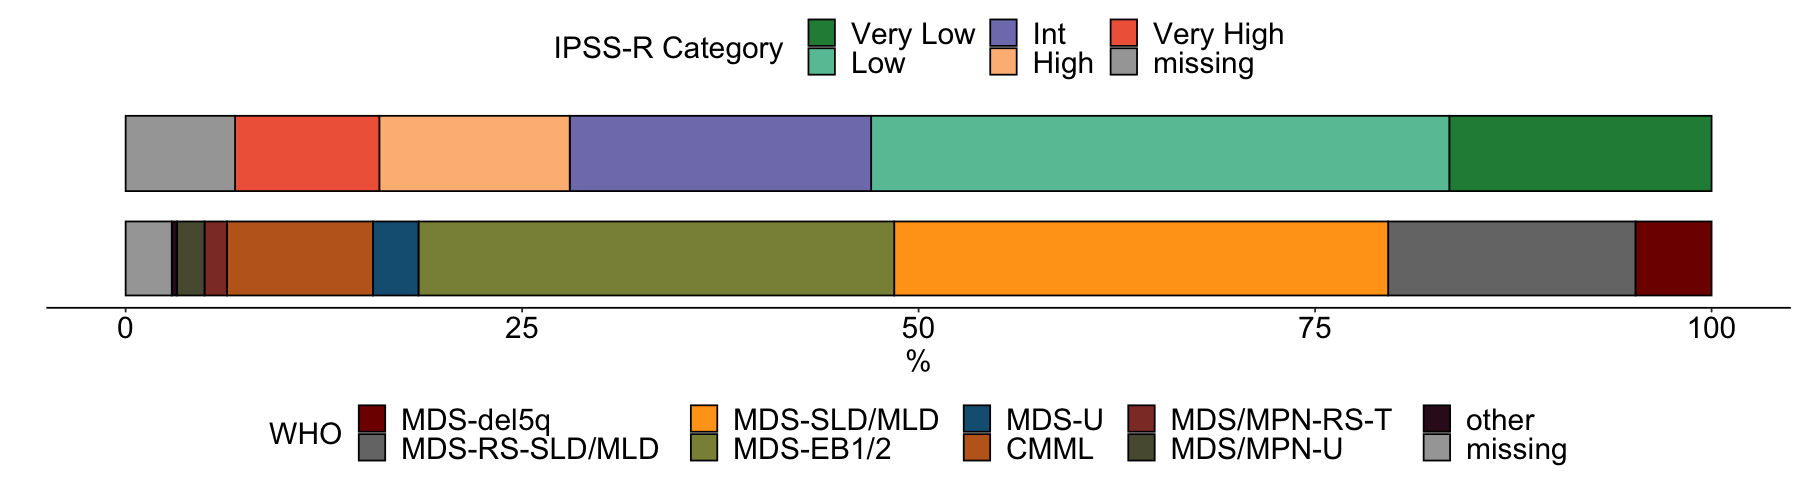

In [21]:
options(repr.plot.width=15, repr.plot.height=4)

giw <- ggarrange(gsipss + theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())+ylab(""),
          NULL,
          gswho + theme(legend.position="bottom"),
          heights=c(1,-0.2,1.12),
          ncol=1)
giw
ggsave(giw, file="figures/vi/outline/ipsswho.pdf",width=15, height=4)
ggsave(giw, file="figures/vi/outline/ipsswho.png",width=15, height=4)

# Molecular Characteristics

In [22]:
maf <- ddmaf[(ddmaf$TARGET_NAME %in% dd.restrict.free$LEUKID) & !ddmaf$GENE%in% c("PHIP","YLPM1") , ]

In [23]:
mymaf = CreateCombineMaf(maf, ddcyto[ddcyto$LEUKID%in%dd.restrict.free$LEUKID,], 
                         complex.vector=dd.restrict.free$complex)

In [24]:
mymaf2 <- mymaf[!grepl("upd",mymaf$Alteration) & 
                !grepl("mar",mymaf$Alteration) & !grepl("WGA",mymaf$Alteration),]

In [25]:
mmaf <- mymaf[mymaf$Type=="Gene",]

In [26]:
1*nrow(dd.restrict.free)/100
# all genes mutated in more than 1% | all genes with more than 5 mutations
gogenes1 <- c(colnames(ddmut)[apply(dd.restrict.free[,colnames(ddmut)],2,sum)>30],"MLL","FLT3")
gogenes2 <- colnames(ddmut)[!colnames(ddmut)%in%gogenes1 & apply(dd.restrict.free[,colnames(ddmut)],2,sum)>=5]
gogenes2 <- gogenes2[!gogenes2 %in% c("MLL","FLT3")]

[1] 29.57

In [27]:
#tmp.col = pal_lancet(palette ="lanonc", alpha = 1)(9)
#col.consequence = c(tmp.col[c(1,4,7,3,5)],"#df65b0","#636363")
tmp.col = pal_lancet(palette ="lanonc", alpha = 1)(9)
col.consequence = c(tmp.col[c(1,4,7,3,8,6)],"#df65b0")

In [28]:
g0 <- ggplot(mmaf) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(28) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
noxtitle + ylab("% of patients") + 
scale_fill_manual(values=col.consequence,
                  labels=c("Missense","Inframe indel","Truncated","Multiple mut.","ITD","PTD","Promoter")
                 ) +
guides(fill=guide_legend(nrow=4))
legend <- get_legend(g0)
#g0

In [30]:
options(repr.plot.width=25, repr.plot.height=12)
g1 <- ggplot(mmaf[mmaf$Identity%in%gogenes1,]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(26) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5,hjust=1)) +
noxtitle + ylab("% of patients") + 
scale_fill_manual(values=col.consequence)
#g1

options(repr.plot.width=25, repr.plot.height=6)
g2 <- ggplot(mmaf[mmaf$Identity%in%gogenes2,]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(18) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") + scale_fill_manual(values=col.consequence[-c(5,6)])
#g2

options(repr.plot.width=25, repr.plot.height=8)
library(cowplot)
cbar <- ggdraw() +
draw_plot(g1 + noleg) +
draw_plot(g2 + noleg, x = 0.4, y = .5, width = .6, height = .5)

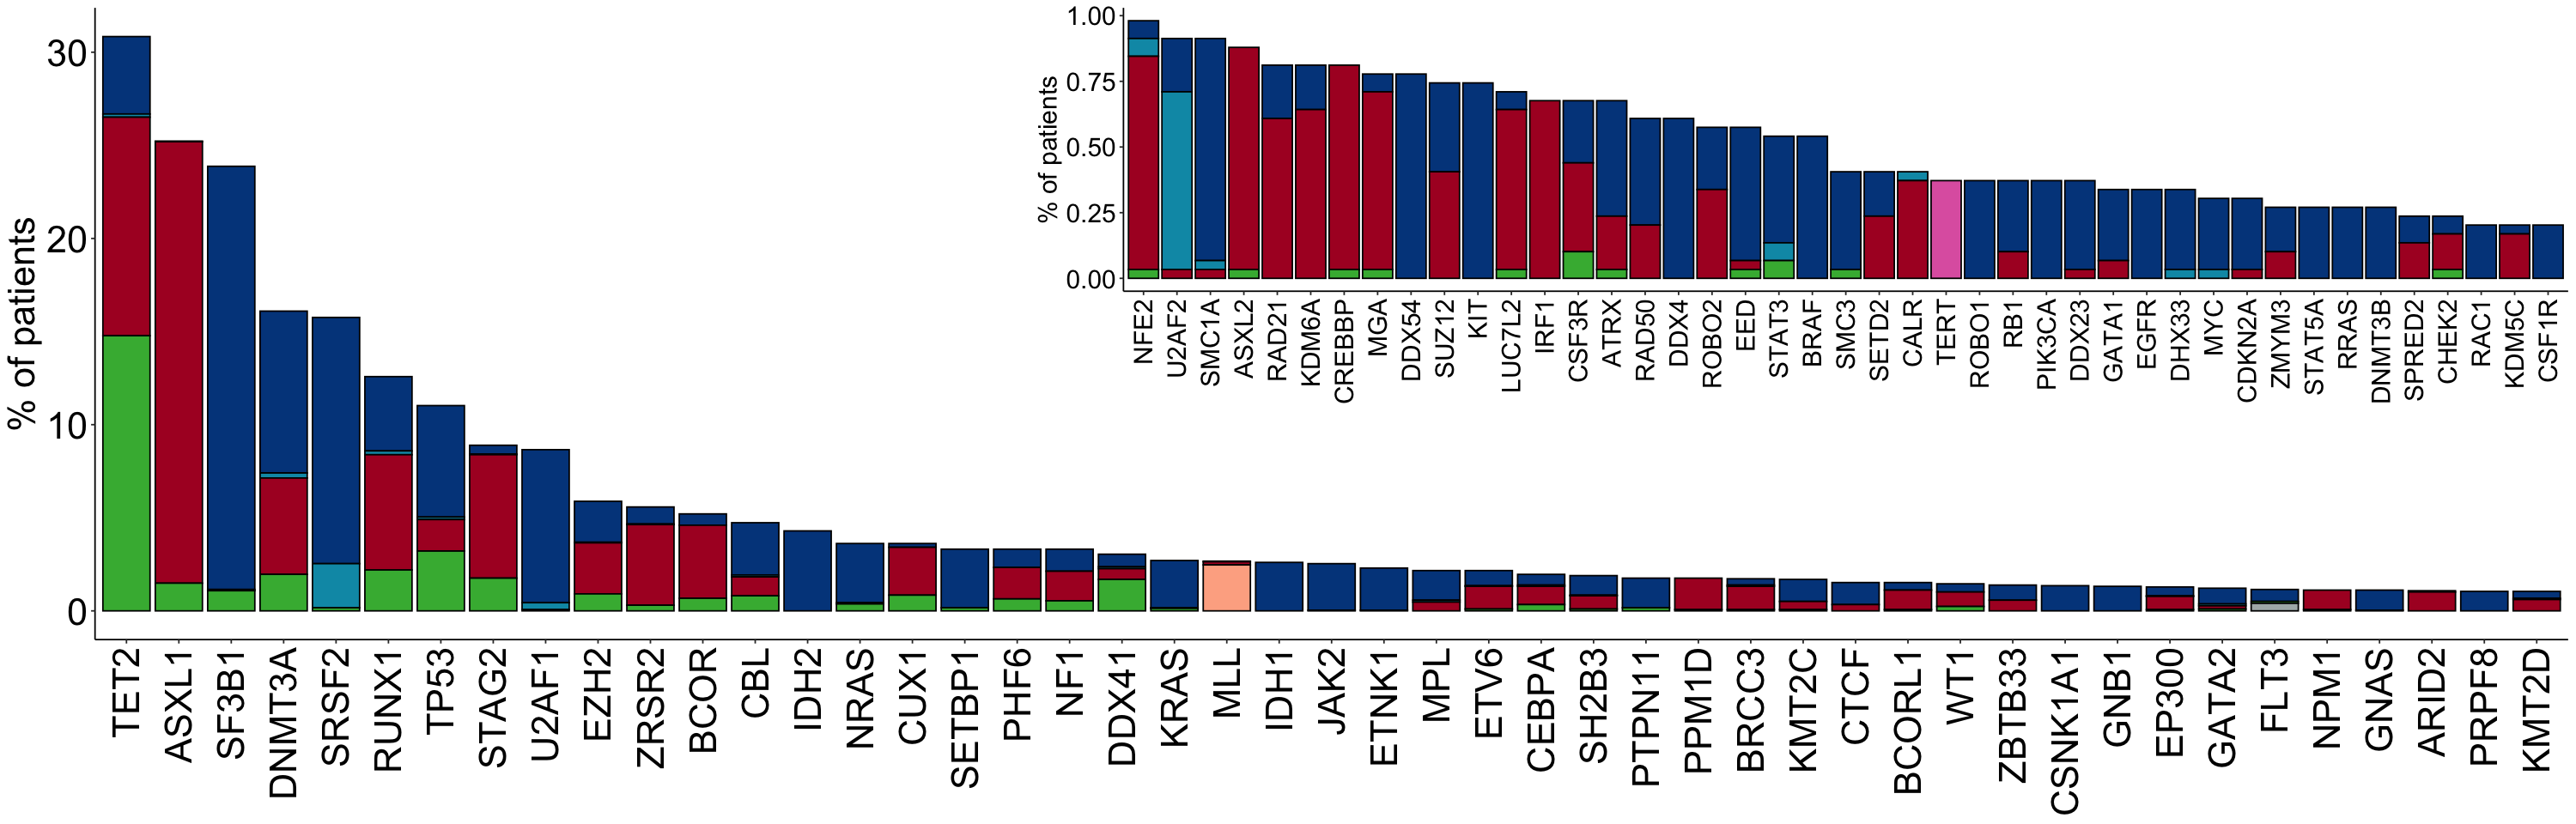

In [31]:
ggsave(cbar, file="figures/vi/outline/bar.png", width=25, height=8)
ggsave(cbar, file="figures/vi/outline/bar.pdf", width=25, height=8)
cbar

In [32]:
cbarleg <- ggarrange(legend)
ggsave(cbarleg, file="figures/vi/outline/barleg.png", width=8, height=4)
ggsave(cbarleg, file="figures/vi/outline/barleg.pdf", width=8, height=4)

Below again but including (some) cytogenetics

In [33]:
#gocyto

In [34]:
im <- match(dd.restrict.free$LEUKID, dd$LEUKID)
ddcyto.restrict.free <- ddcyto[im,]
allchr <- colnames(ddcyto)[-1]
allcyto <- allchr[grepl("del",allchr) | grepl("plus",allchr) | grepl("r_",allchr) | grepl("iso",allchr)]

In [35]:
gogenes3 <- colnames(ddmut)[!colnames(ddmut)%in%gogenes1 & apply(dd.restrict.free[,colnames(ddmut)],2,sum)>=10]
gogenes3 <- gogenes3[!gogenes3 %in% c("MLL","FLT3")]
#gogenes3

In [36]:
gocyto1 <- c("complex",allcyto[apply(dd.restrict.free[dd.restrict.free$complex=="non-complex",allcyto],2,sum)>30])
gocyto1 <- gocyto1[!gocyto1%in%c("del4q24","r_9_9","plus1q")]
gocyto2 <- allcyto[!allcyto%in%gocyto1 &  apply(dd.restrict.free[dd.restrict.free$complex=="non-complex",allcyto],2,sum)>=10]
gocyto2 <- gocyto2[!gocyto2%in%c("del4q24","r_9_9","plus1q")]
# plus1q is linked to t(1,7) so remove 

In [37]:
col.consequence2 = c(tmp.col[c(1,4,7,3,8,6)],"#df65b0",tmp.col[5])
#col.consequence2 = pal_lancet(palette ="lanonc", alpha = 1)(9) #c(tmp.col[c(1,4,7,3,8,6)],"#df65b0","yellow")

In [38]:
h0<- ggplot(mymaf2) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(28) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
noxtitle + ylab("% of patients") + 
scale_fill_manual(values=col.consequence2,
                  labels=c("Missense","Inframe indel","Truncated","Multiple mut.",
                           "ITD","PTD","Promoter","Cytogenetic")
                 ) +
guides(fill=guide_legend(nrow=4))
legendh <- get_legend(h0)
#h0

In [39]:
lc1 <- levels(mymaf2$Identity)[levels(mymaf2$Identity)%in%c(gogenes1,gocyto1)]
lc11 <- lc1
lc11 <- gsub("del7q","del(7q)",gsub("delY","-Y",gsub("plus","+",gsub("del5q","del(5q)",lc11))))
lc11 <- gsub("del11q","del(11q)",gsub("del7","-7",gsub("del20q","del(20q)",lc11)))

lc2 <- levels(mymaf2$Identity)[levels(mymaf2$Identity)%in%c(gogenes2,gocyto2)]
lc22 <- lc2
lc22 <- gsub("del4q","del(4q)",gsub("plus","+",gsub("del13","-13",gsub("del12p","del(12p)",lc22))))
lc22 <- gsub("del1p","del(1p)",gsub("r_1_7","t(1;7)",lc22))

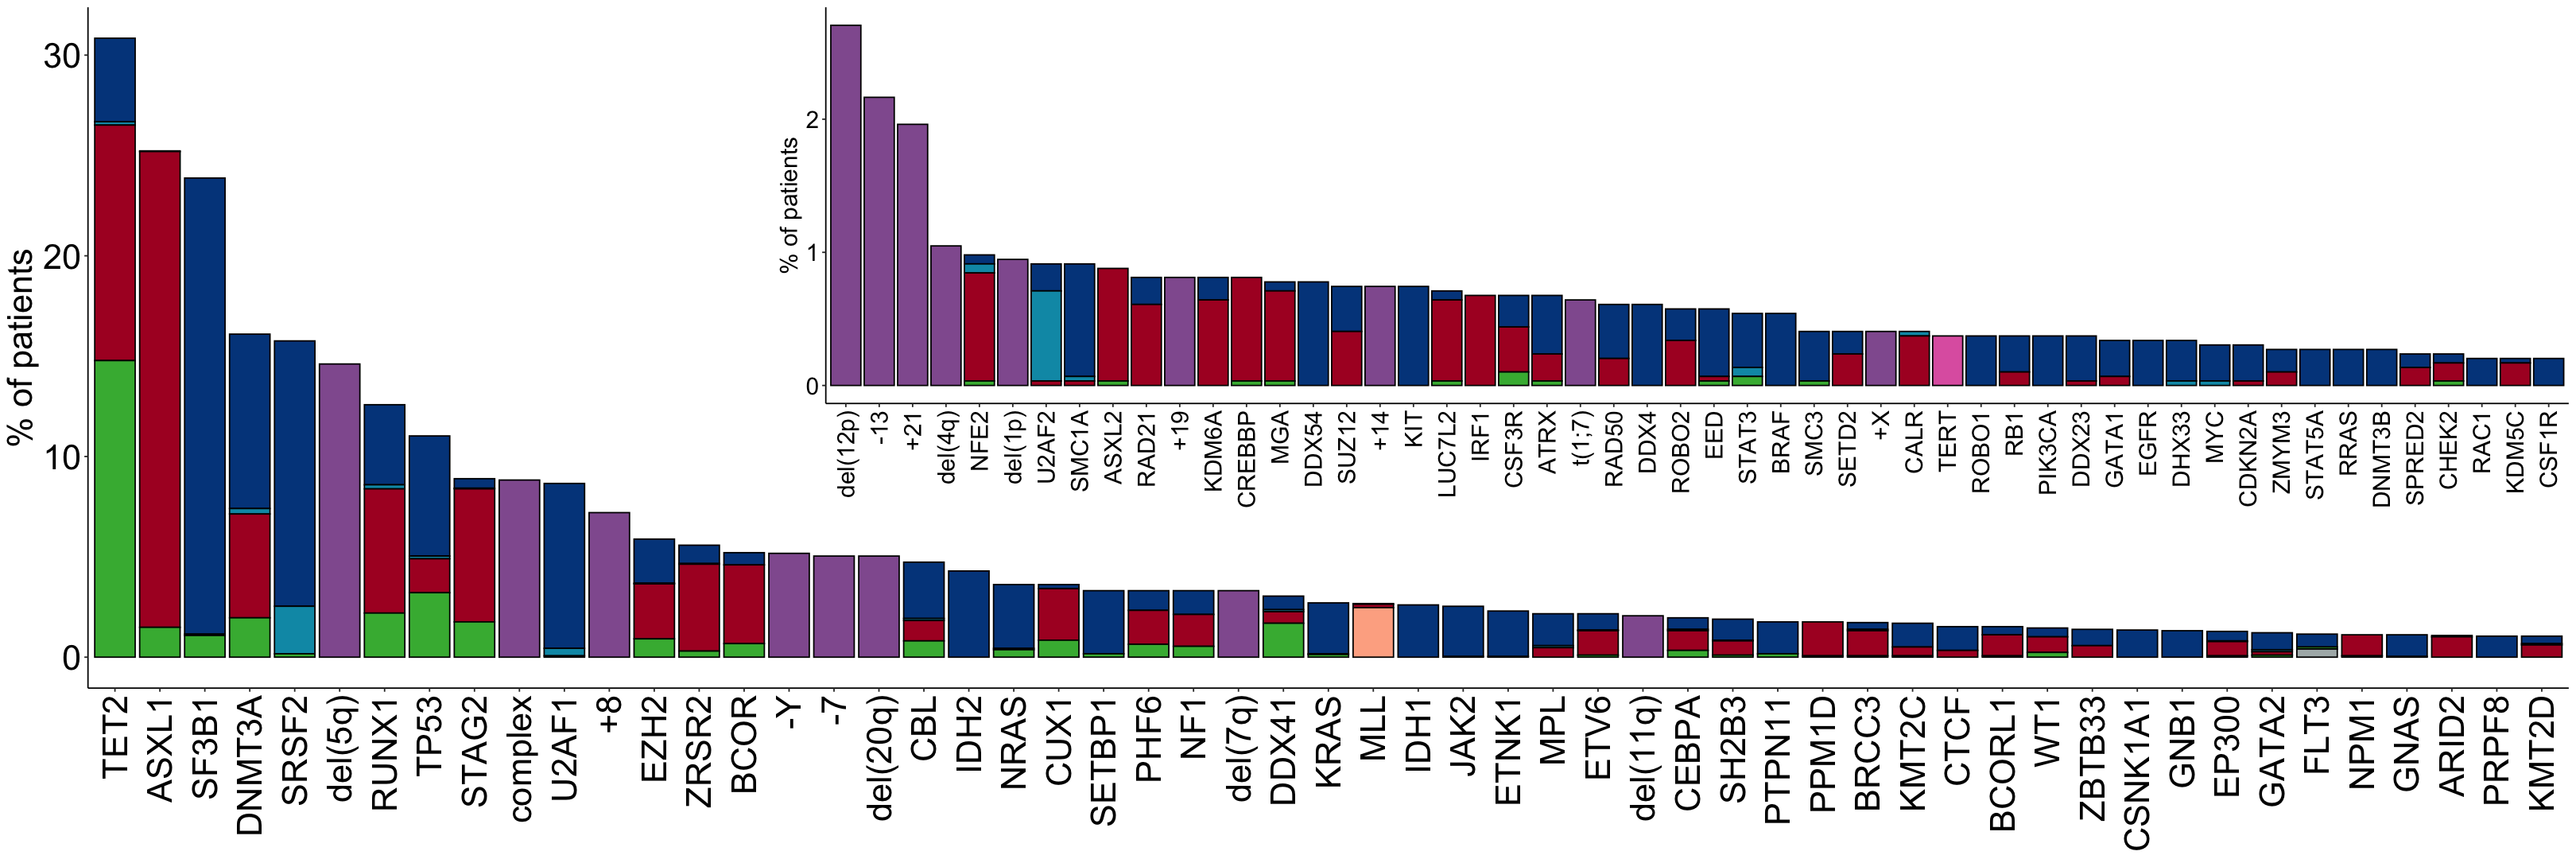

In [40]:
options(repr.plot.width=25, repr.plot.height=12)
h1 <- ggplot(mymaf2[mymaf2$Identity%in%c(gogenes1,gocyto1),]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(26) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") + 
scale_fill_manual(values=col.consequence2[-7]) + 
scale_x_discrete(labels=lc11)
#h1

h2 <- ggplot(mymaf2[mymaf2$Identity%in%c(gogenes2,gocyto2),]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(18) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") + scale_fill_manual(values=col.consequence2[-c(5,6)]) +
scale_x_discrete(labels=lc22)
#h2

options(repr.plot.width=27, repr.plot.height=9)
cbar2 <- ggdraw() +
draw_plot(h1 + noleg) +
draw_plot(h2 + noleg, x = 0.3, y = .4, width = .7, height = .6)
cbar2

In [41]:
ggsave(cbar2, file="figures/vi/outline/bar2.png", width=27, height=9)
ggsave(cbar2, file="figures/vi/outline/bar2.pdf", width=27, height=9)

In [42]:
cbarleg2 <- ggarrange(legendh)
ggsave(cbarleg2, file="figures/vi/outline/barleg2.png", width=8, height=4)
ggsave(cbarleg2, file="figures/vi/outline/barleg2.pdf", width=8, height=4)

In [44]:
#library("ggpattern")
#zzz <- mymaf2[mymaf2$Identity%in%c(gogenes1,gocyto1),]
#head(zzz)
#zzz$pattern <- 0
#zzz$pattern[zzz$Identity=="complex"] <- 1
#hh1 <- ggplot(zzz) +
#geom_bar_pattern(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence, pattern=pattern),color="black") #+

## Fig. 1A

In [234]:
MetBrewer::colorblind_palettes
MetBrewer::colorblind.friendly("Derain")

[1] "Archambault" "Cassatt1"    "Cassatt2"    "Demuth"      "Derain"     
 [6] "Egypt"       "Greek"       "Hiroshige"   "Hokusai2"    "Hokusai3"   
[11] "Ingres"      "Isfahan1"    "Isfahan2"    "Java"        "Johnson"    
[16] "Kandinsky"   "Morgenstern" "OKeeffe1"    "OKeeffe2"    "Pillement"  
[21] "Tam"         "Troy"        "VanGogh3"    "Veronese"

[1] TRUE

In [154]:
col.fig1a <- met.brewer("Derain")
#col.fig1a
#col.fig1a <- c( col.fig1a[c(2,3,4,1)] , "grey85", "grey85" , col.fig1a[c(6,7)] )
col.fig1a <- c( col.fig1a[c(2,3,4,6,1,1)] , "grey85" , col.fig1a[c(7)] )

In [191]:
options(repr.plot.width=8, repr.plot.height=4)

llabels=c("Missense","Inframe indel","Truncated","Multiple mut.",
                           "Tandem duplication","Promoter","Cytogenetic")

tmp <- mymaf2
tmp$Consequence <- as.vector(tmp$Consequence)
tmp$Consequence[tmp$Consequence%in%c("itd","ptd")] <- "tandem duplication"
table(tmp$Consequence)
tmp$Consequence <- factor(tmp$Consequence, levels=unique(gsub("ptd","tandem duplication",gsub("itd","tandem duplication",levels(mymaf2$Consequence)))))

h0<- ggplot(tmp) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence),color="black") +
theme_classic() + gtheme(26) + 
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5)) +
noxtitle + ylab("% of patients") + 
scale_fill_manual(values=col.fig1a[-5],
                  labels=llabels
                 ) +
guides(fill=guide_legend(nrow=4))
legendh <- get_legend(h0)
cbarleg2 <- ggarrange(legendh)


       chromosomal      inframe-indel           missense multiple-mutations 
              3353                163               3777               1062 
          promoter tandem duplication          truncated 
                11                 85               2851 

In [228]:
options(repr.plot.width=25, repr.plot.height=12)
h1 <- ggplot(mymaf2[mymaf2$Identity%in%c(gogenes1,gocyto1),]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence), color="black", size=.8, width=.84) +
theme_classic() + gtheme(26) +
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("% of patients") +
scale_fill_manual( values=col.fig1a[-7] ) +
scale_x_discrete(labels=lc11)
#h1

h2 <- ggplot(mymaf2[mymaf2$Identity%in%c(gogenes2,gocyto2),]) +
geom_bar(aes(x=Identity,y=100*(..count../nrow(dd.restrict.free)),fill=Consequence), color="black", size=.8, width=.84) +
theme_classic() + gtheme(22) +
topleg + nolegtitle + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
noxtitle + ylab("") + scale_fill_manual( values=col.fig1a[-c(5,6)] ) +
scale_x_discrete(labels=lc22)
#h2

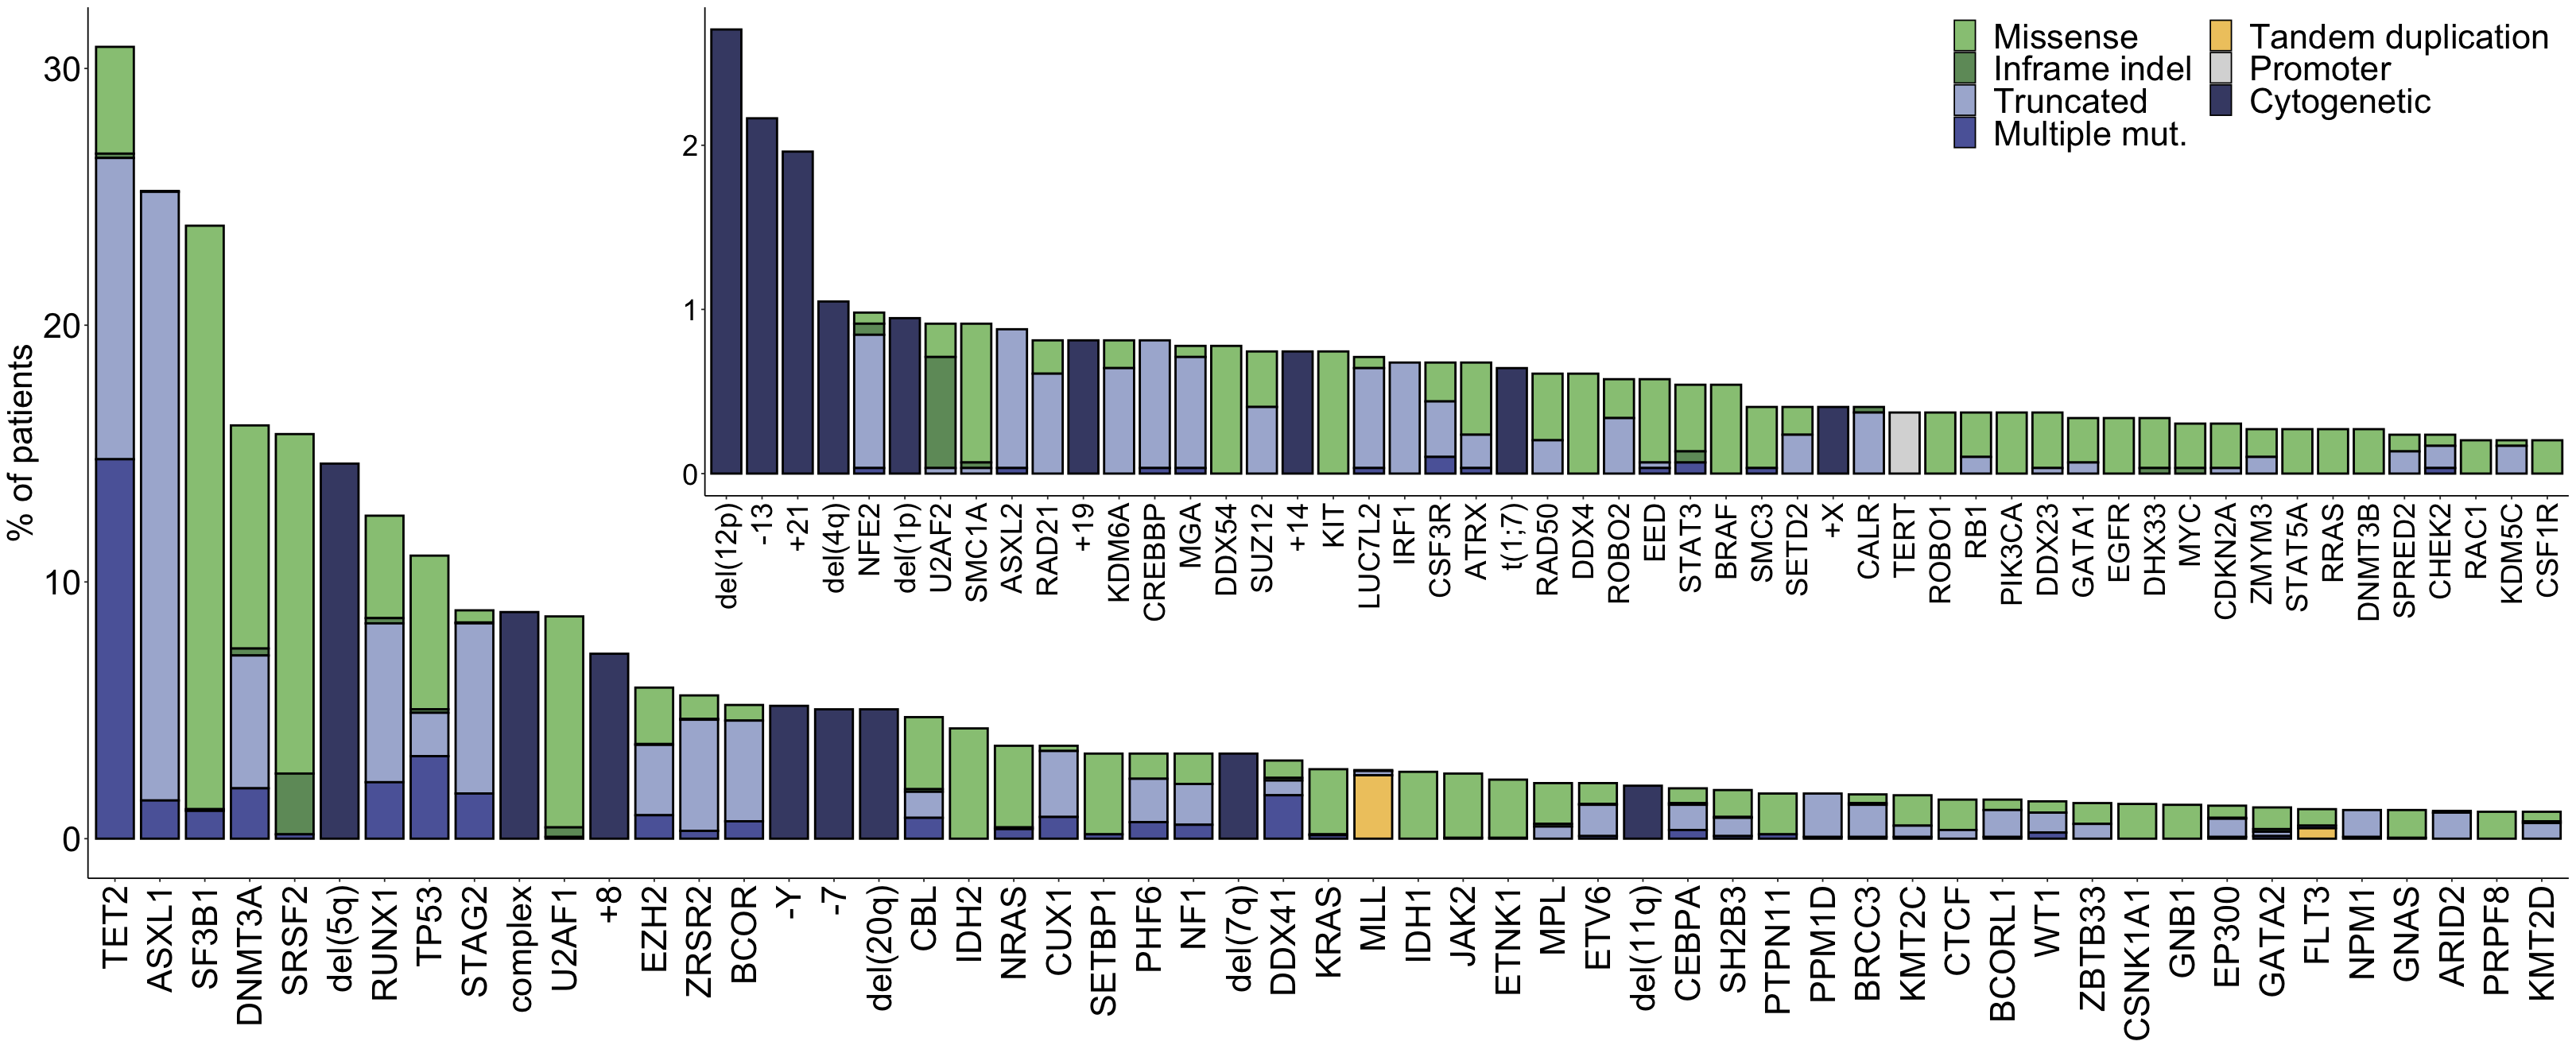

In [230]:
options(repr.plot.width=27, repr.plot.height=11)
cbar2 <- ggdraw() +
draw_plot(h1 + noleg) +
draw_plot(h2 + noleg, x = .25, y = .4, width = .75, height = .6) + 
draw_plot(cbarleg2, x = .72, y = .72, width = .3, height = .4)
cbar2

In [231]:
ggsave(cbar2, file="figures/vi/outline/Fig1A_bar.pdf", width=27, height=11)
ggsave(cbar2, file="figures/vi/outline/Fig1A_bar.png", width=27, height=11)
ggsave(cbar2, file="figures/vi/outline/Fig1A_bar.eps", width=27, height=11)

# Nonc

In [195]:
allg <- colnames(ddmut)[!colnames(ddmut) %in% c("PHIP","YLPM1")]
dd.restrict.free$num_gene <- apply(dd.restrict.free[,allg],1,sum)
dd.restrict.free$num_cyto <- apply(ddcyto.restrict.free[,allcyto],1,sum)
im <- match(dd.restrict.free$LEUKID, dd$LEUKID)
dd.restrict.free$num_mut <- apply(ffmut[im,allg],1,sum) 
dd.restrict.free$num_driver <- dd.restrict.free$num_mut + dd.restrict.free$num_cyto

In [196]:
summary(dd.restrict.free$num_mut)
summary(dd.restrict.free$num_driver)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    3.00    3.13    4.00   15.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.171   6.000  20.000 

In [232]:
#gcol = c("#c51b8a","#542788","#8073ac","#fbb4b9","#d6604d","#01665e","#80cdc1","#f1b6da","#ffffb2","#bababa")
#gcol = c("#c51b8a","#542788","#8073ac","#fbb4b9","#d6604d","#80cdc1","#f1b6da","#ffffb2","grey45")
gcol = c("#045a8d","#3690c0",pal_uchicago()(1),"#a6bddb","#7fcdbb","#016c59","#02818a","#74c476","grey45")

cc <- 8
dd.restrict.free$range_gene = dd.restrict.free$num_gene
dd.restrict.free$range_gene[dd.restrict.free$num_gene>cc] = paste0(">",cc)
dd.restrict.free$range_gene = factor(dd.restrict.free$range_gene, levels=c(0:cc,paste0(">",cc)))

dd.restrict.free$range_driver = dd.restrict.free$num_driver
dd.restrict.free$range_driver[dd.restrict.free$num_driver>cc] = paste0(">",cc)
dd.restrict.free$range_driver = factor(dd.restrict.free$range_driver, levels=c(0:cc,paste0(">",cc)))

if (1==0) {
dd.restrict.free$onecase2 =  sapply(1:nrow(dd.restrict.free), function(i) {
	   x = dd.restrict.free$num_gene[i]
	   res = NA
	   p = dd.restrict.free$LEUKID[i]
	   if (x==1) {
           res = as.vector(mymaf[mymaf$TARGET_NAME==p & !grepl("upd",mymaf$Alteration) & !grepl("mar",mymaf$Alteration) & 
                                 !grepl("delY",mymaf$Alteration) & !grepl("plusX",mymaf$Alteration),"Alteration"])[1]
	   }
	   return(res)
})
}

dd.restrict.free$onecase =  sapply(1:nrow(dd.restrict.free), function(i) {
	   x = dd.restrict.free$num_driver[i]
	   res = NA
	   p = dd.restrict.free$LEUKID[i]
	   if (x==1) {
	       res = as.vector(mymaf2[mymaf2$TARGET_NAME==p,"Alteration"])
	   }
	   return(res)
})

aa = dd.restrict.free
a = names(sort(table(dd.restrict.free$onecase),decreasing=T)[1:8])
aa$label = NA
aa$label[!is.na(aa$onecase)] = "other"
aa$label[which(aa$onecase %in% a)] = aa$onecase[which(aa$onecase %in% a)]
aa$label = factor(aa$label, levels=c(a,"other"))

In [236]:
levels(aa$label)
barlev <- gsub("del20q","del(20q)",gsub("delY","-Y",gsub("del5q","del(5q)",levels(aa$label))))

[1] "SF3B1"  "TET2"   "del5q"  "DNMT3A" "ASXL1"  "delY"   "DDX41"  "del20q"
[9] "other"

In [273]:
MetBrewer::colorblind_palettes
MetBrewer::colorblind.friendly("Demuth")

[1] "Archambault" "Cassatt1"    "Cassatt2"    "Demuth"      "Derain"     
 [6] "Egypt"       "Greek"       "Hiroshige"   "Hokusai2"    "Hokusai3"   
[11] "Ingres"      "Isfahan1"    "Isfahan2"    "Java"        "Johnson"    
[16] "Kandinsky"   "Morgenstern" "OKeeffe1"    "OKeeffe2"    "Pillement"  
[21] "Tam"         "Troy"        "VanGogh3"    "Veronese"

[1] TRUE

[1] "SF3B1"    "TET2"     "del(5q)"  "DNMT3A"   "ASXL1"    "-Y"       "DDX41"   
[8] "del(20q)" "other"

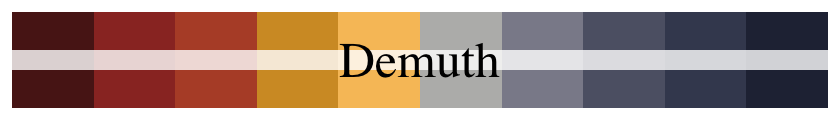

In [277]:
# 5 mut 
# 3 del
# other
# rest --> 10 cols
options(repr.plot.width=7, repr.plot.height=1)
demuth <- met.brewer("Demuth")
demuth
col.fig1b <- c(demuth[1:5],demuth[c(10,9,8,7)])
#c(demuth[1:2], demuth[10] , demuth[3:4] , demuth[9] , demuth[5] , demuth[8] , demuth[7])
barlev

#col.fig1a
#col.fig1b <- 

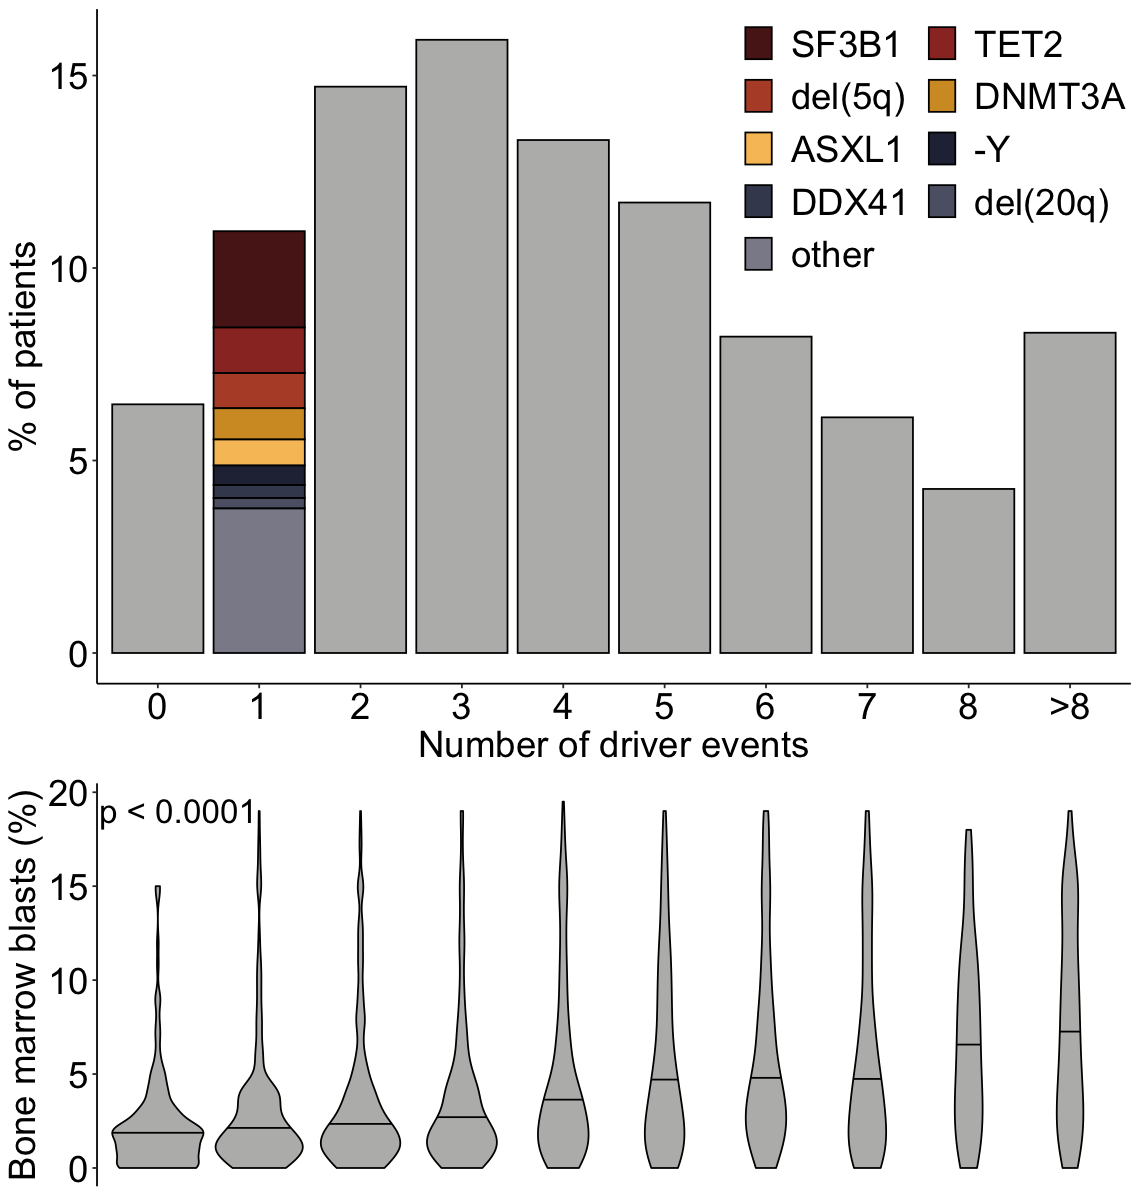

In [414]:
gh0 <- ggplot(aa[!is.na(aa$label),], aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"NA"),
                  na.value=demuth[6]) +  
nolegtitle + xlab("Number of driver events") + 
guides(fill=guide_legend(ncol=2,byrow=TRUE)) + 
theme(legend.position = c(0.8, 0.8)) + nolegtitle

legendh0 <- get_legend(gh0)
histleg <- ggarrange(legendh0)
#histleg

gh <- ggplot(aa, aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=col.fig1b,
                  labels=c(barlev,"lala"),
                  na.value=demuth[6]) +  
noleg + xlab("Number of driver events")

gb <- ggplot(aa, aes(x=range_driver,y=BM_BLAST)) + 
geom_violin(color="black",draw_quantiles = .5,fill=demuth[6]) + 
theme_classic() + gtheme(22)  + ylab("Bone marrow blasts (%)") + 
#stat_compare_means() +
annotate("text",label=paste0("p"," < ","0.0001"),y=19,x=1.2,size=7) +
nolegtitle + noxtitle +
#scale_y_continuous(breaks=c(0,-5,-10,-15,-20),labels=c(0,5,10,15,20)) +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

ghh <- ggdraw() +
draw_plot(gh + noleg) +
draw_plot(histleg, x = .58, y = .5, width = .3, height = .4)

options(repr.plot.width=9.5, repr.plot.height=10)
gtwo <- ggarrange(ghh, gb, ncol=1, heights=c(2,1.1))
gtwo

ggsave(gtwo, file="figures/vi/outline/Fig1B_nonc.png",width=10,height=10)
ggsave(gtwo, file="figures/vi/outline/Fig1B_nonc.pdf",width=10,height=10)
ggsave(gtwo, file="figures/vi/outline/Fig1B_nonc.eps",width=10,height=10)

In [251]:

if (1==0) {
gh <- ggplot(aa, aes(x=range_driver,fill=label,y=100*..count../sum(..count..))) + 
geom_bar(color="black") + 
theme_classic() + gtheme(22)  + ylab("% of patients") + 
scale_fill_manual(values=gcol,
                  labels=c(barlev,"lala"),
                  na.value="grey65") + 
nolegtitle + xlab("Number of driver events") + 
guides(fill=guide_legend(ncol=2,byrow=TRUE)) + 
theme(legend.position = c(0.8, 0.8))

gb <- ggplot(aa, aes(x=range_driver,y=BM_BLAST)) + 
geom_violin(color="black",draw_quantiles = .5,fill="grey65") + 
theme_classic() + gtheme(22)  + ylab("Bone marrow blasts (%)") + 
#stat_compare_means() +
annotate("text",label=paste0("p"," < ","0.0001"),y=19,x=1.2,size=7) +
nolegtitle + noxtitle +
#scale_y_continuous(breaks=c(0,-5,-10,-15,-20),labels=c(0,5,10,15,20)) +
theme(axis.line.x=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank())

options(repr.plot.width=10, repr.plot.height=9)
gtwo <- ggarrange(gh, gb, ncol=1, heights=c(2,1.1))
gtwo
#ggsave(gtwo, file="figures/vi/outline/nonc.png",width=10,height=10)
#ggsave(gtwo, file="figures/vi/outline/nonc.pdf",width=10,height=10)
}

## Nonc KM

In [281]:
table(aa$label)


 SF3B1   TET2  del5q DNMT3A  ASXL1   delY  DDX41 del20q  other 
    74     35     27     24     20     15     10      8    111 

In [282]:
levels(aa$range_driver)
aa$range_driver2 <- as.vector(aa$range_driver)
aa$range_driver2[aa$label=="SF3B1"] <- "isolated SF3B1"
aa$range_driver2 <- factor(aa$range_driver2, levels=c("0","isolated SF3B1","1",levels(aa$range_driver)[-c(1,2)]))

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  ">8"

In [283]:
aa$range_driver2 <- as.vector(aa$num_driver)
aa$range_driver2[aa$num_driver>6] <- ">6"
aa$range_driver2[aa$label=="SF3B1"] <- "isolated SF3B1"
aa$range_driver2 <- factor(aa$range_driver2, levels=c("0","isolated SF3B1",1:6,">6"))

In [284]:
cc <- 6
aa$range_driver3 <- as.vector(aa$num_driver)
aa$range_driver3[aa$num_driver>cc] <- paste0(">",cc)
aa$range_driver3[aa$num_driver%in%c(1,2)] <- "1-2"
aa$range_driver3[aa$num_driver%in%c(3,4)] <- "3-4"
aa$range_driver3[aa$num_driver%in%c(5,6)] <- "5-6"
aa$range_driver3[aa$label=="SF3B1"] <- "isolated SF3B1"
#aa$range_driver3[aa$isolated5q==1 & aa$num_driver==1] <- "del(5q) only"
#aa$range_driver3[aa$isolated5q==1 & aa$num_driver>1] <- "del(5q) other"
aa$range_driver3 <- factor(aa$range_driver3, levels=c("0","isolated SF3B1","1-2","3-4","5-6",paste0(">",cc)))

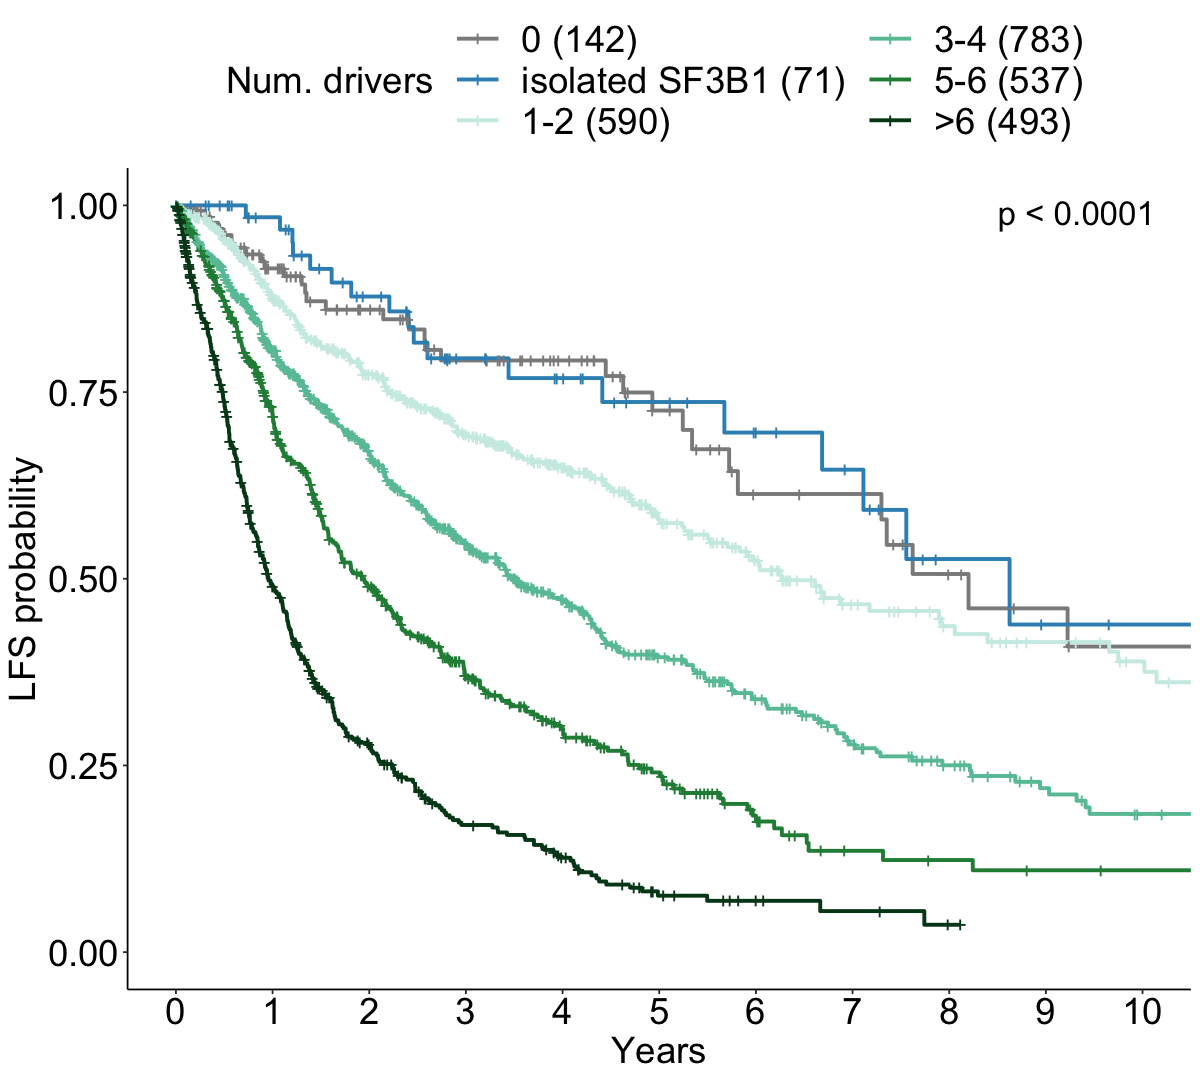

In [286]:
# LFS
#c("#2b8cbe","#df65b0")
#"#3690c0",pal_uchicago()(1)
nncol <- c(
"grey55",
"#3690c0",
#pal_uchicago()(1)
"#ccece6",
#"#99d8c9",
"#66c2a4",
#"#41ae76",
"#238b45",
#"#006d2c",
"#00441b"    
)
look <- "range_driver3"

ff.free = as.formula(paste("Surv(free_os_sample_years,free_os_status)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata))," (",km.free$n,")")
gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look, 
                   legend.labs=myleg.free, 
                   legend.title="Num. drivers",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=FALSE
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
#scale_color_igv() +
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

options(repr.plot.width=10, repr.plot.height=9)
gfree
ggsave(gfree, file="figures/vi/outline/noncKM.png",width=10,height=9)
ggsave(gfree, file="figures/vi/outline/noncKM.pdf",width=10,height=9)

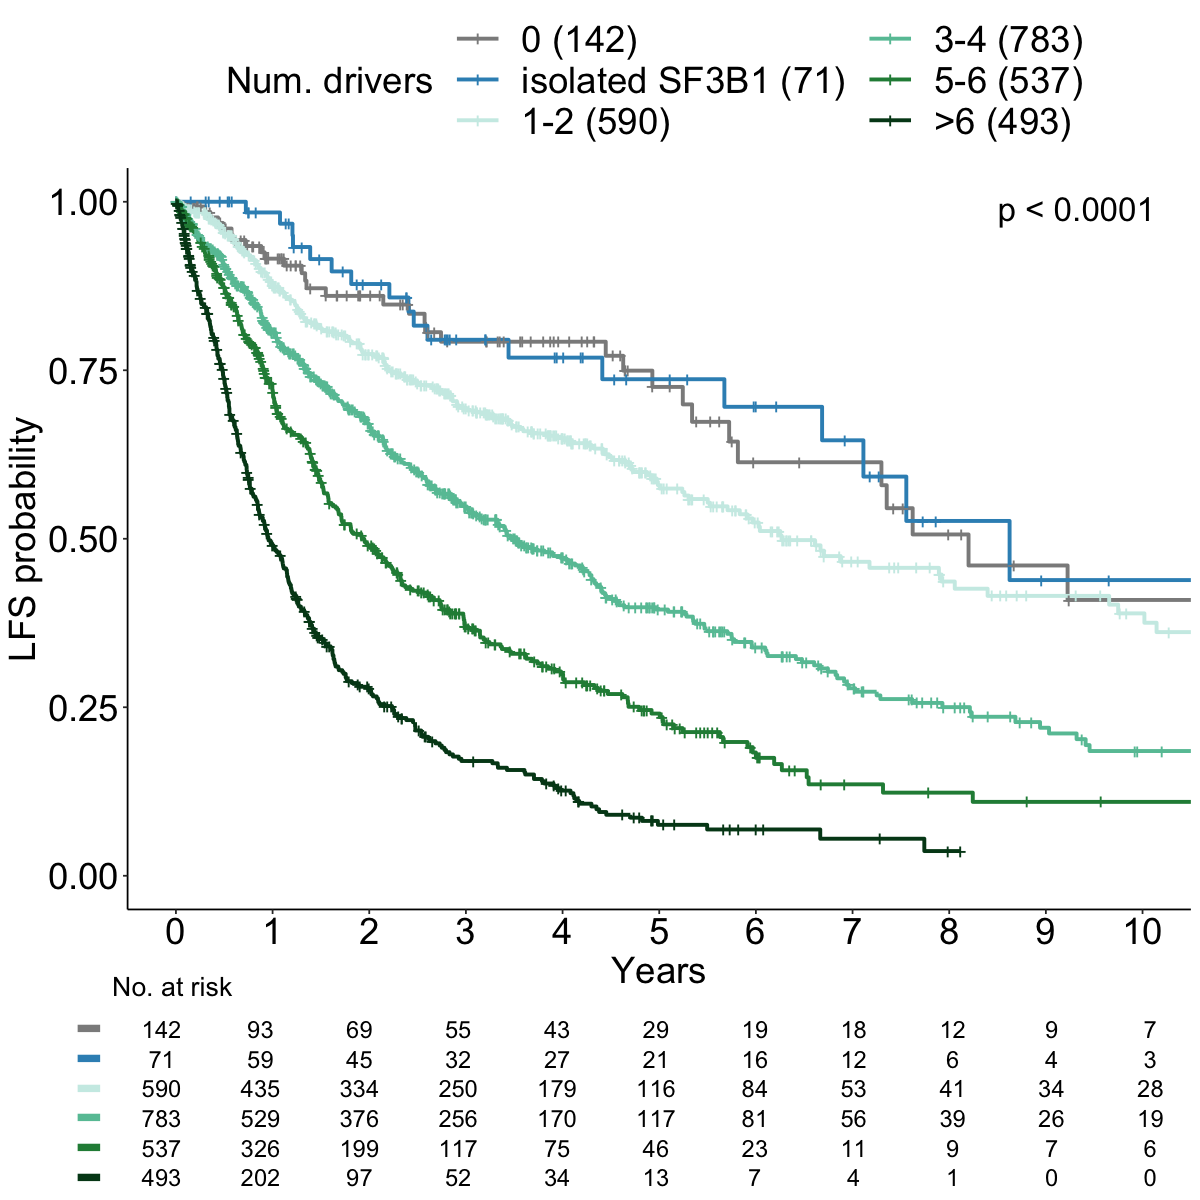

In [287]:
ff.free = as.formula(paste("Surv(free_os_sample_years,free_os_status)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata))," (",km.free$n,")")

gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look,
                   legend.labs=myleg.free, 
                   legend.title="Num. drivers",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=TRUE,
                   #tables.col="look", 
                   tables.y.text=FALSE,
                   risk.table.title="No. at risk",risk.table.fontsize=5
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

options(repr.plot.width=10, repr.plot.height=10)
gfree2 <- ggarrange(gfree, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.6), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))
gfree2
ggsave(gfree2, file="figures/vi/outline/noncKMatrisk.png",width=9,height=10)
ggsave(gfree2, file="figures/vi/outline/noncKMatrisk.pdf",width=9,height=10)

## Fig 1C

In [415]:
MetBrewer::colorblind_palettes
MetBrewer::colorblind.friendly("Cassatt2")

[1] "Archambault" "Cassatt1"    "Cassatt2"    "Demuth"      "Derain"     
 [6] "Egypt"       "Greek"       "Hiroshige"   "Hokusai2"    "Hokusai3"   
[11] "Ingres"      "Isfahan1"    "Isfahan2"    "Java"        "Johnson"    
[16] "Kandinsky"   "Morgenstern" "OKeeffe1"    "OKeeffe2"    "Pillement"  
[21] "Tam"         "Troy"        "VanGogh3"    "Veronese"

[1] TRUE

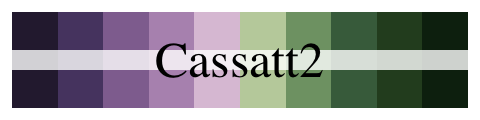

In [416]:
casatt <- met.brewer("Cassatt2")
options(repr.plot.width=4, repr.plot.height=1)
casatt
col.fig1c <- c(casatt[6],casatt[3],casatt[7:10])
#col.fig1c <- c(casatt[c(10,9,8,7,6)],casatt[2])

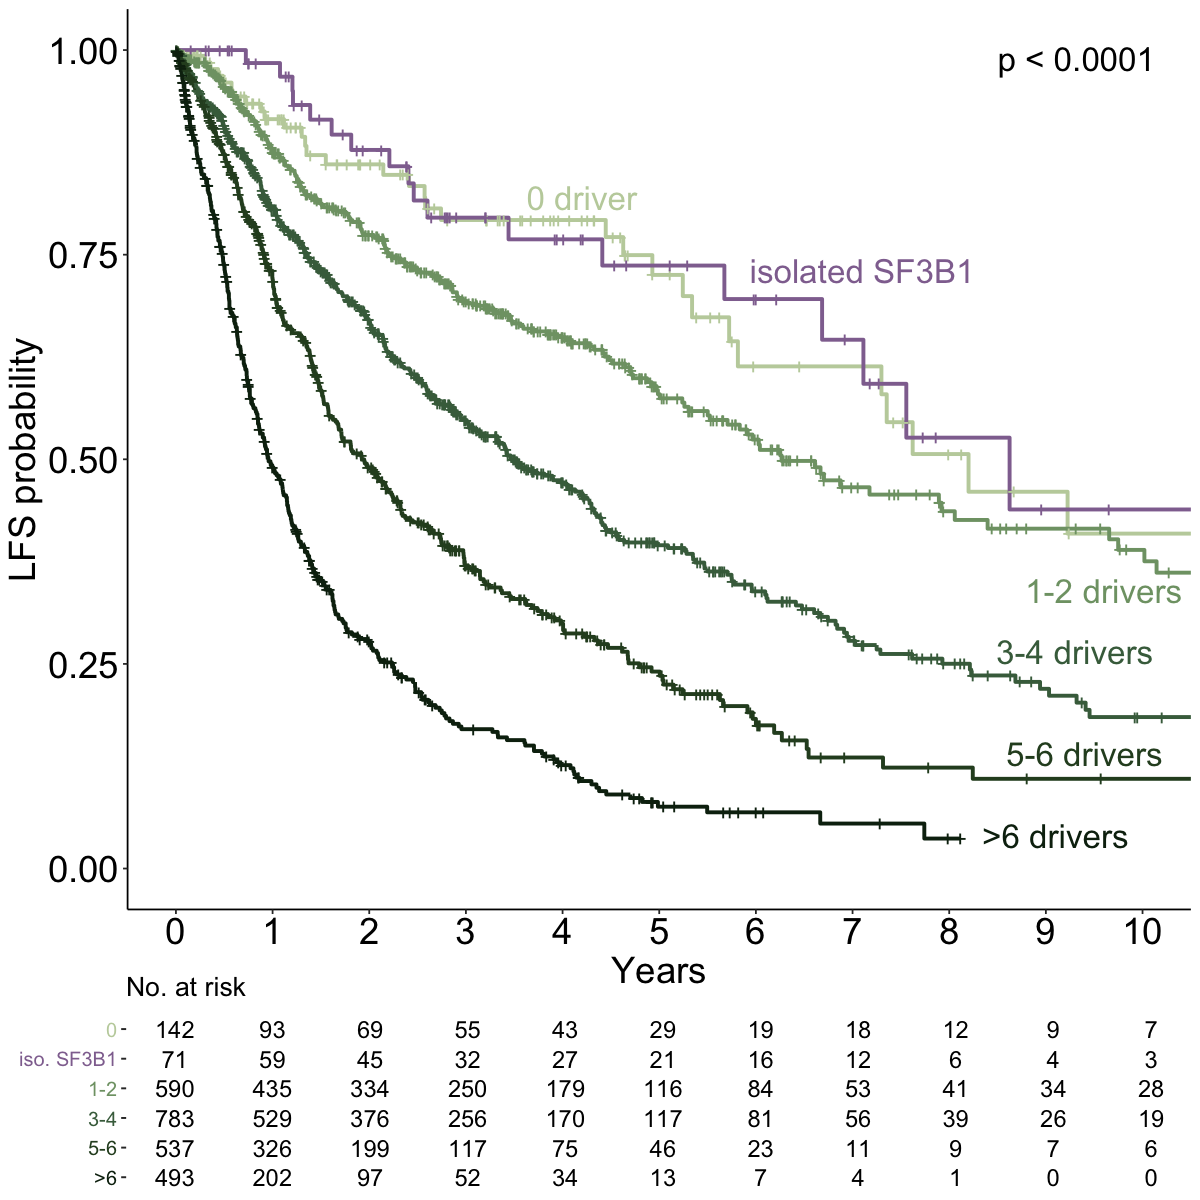

In [419]:
ff.free = as.formula(paste("Surv(free_os_sample_years,free_os_status)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata))," (",km.free$n,")")
myleg.free2 = gsub("isolated","iso.",paste0(gsub(paste0(look,"="),"",names(km.free$strata))))

gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look,
                   legend.labs=myleg.free2, 
                   legend.title="Num. drivers",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=col.fig1c,
                   risk.table=TRUE,
                   risk.tables.y.text=TRUE,
                   risk.tables.y.text.col=TRUE,
                   risk.table.title="No. at risk",risk.table.fontsize=5
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + noleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines')) +
annotate("text", label=">6 drivers", x=9.1, y=.04, size=7, color=casatt[10]) +
annotate("text", label="5-6 drivers", x=9.4, y=0.14, size=7, color=casatt[9]) +
annotate("text", label="3-4 drivers", x=9.3, y=0.265, size=7, color=casatt[8]) +
annotate("text", label="1-2 drivers", x=9.6, y=0.34, size=7, color=casatt[7]) +
annotate("text", label="0 driver", x=4.2, y=0.82, size=7, color=casatt[6]) +
annotate("text", label="isolated SF3B1", x=7.1, y=0.73, size=7, color=casatt[3])
#theme(plot.margin = unit(c(1, 5, 1, 1), "lines"))

gtable.free <- gall.free$table + gtheme(18) +
theme(axis.line=element_blank(), axis.ticks.x=element_blank(),axis.text.x=element_blank()) + 
noxtitle + noytitle + noleg

options(repr.plot.width=10, repr.plot.height=10)
gfree2 <- ggarrange(gfree, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, 1.6), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

gfree2 <- ggarrange(gfree, gtable.free+theme(plot.margin = unit(c(-0.5, 0, 0, .41), "cm")),
                    ncol=1, nrow=2, heights=c(5,1))

gfree2
ggsave(gfree2, file="figures/vi/outline/Fig1C_KMnonc.png",width=10,height=10)
ggsave(gfree2, file="figures/vi/outline/Fig1C_KMnonc.pdf",width=10,height=10)
ggsave(gfree2, file="figures/vi/outline/Fig1C_KMnonc.eps",width=10,height=10)

## Nonc KM more

In [420]:
cc <- 6
aa$range_mut = aa$num_mut
aa$range_mut[aa$range_mut>cc] = paste0(">",cc)
aa$range_mut = factor(aa$range_mut, levels=c(0:cc,paste0(">",cc)))

aa$range_cyto = aa$num_cyto
aa$range_cyto[aa$range_cyto>cc] = paste0(">",cc)
aa$range_cyto = factor(aa$range_cyto, levels=c(0:cc,paste0(">",cc)))

In [421]:
cc <- 6
aa$range_mut3 <- as.vector(aa$num_mut)
aa$range_mut3[aa$num_mut>cc] <- paste0(">",cc)
aa$range_mut3[aa$num_mut%in%c(1,2)] <- "1-2"
aa$range_mut3[aa$num_mut%in%c(3,4)] <- "3-4"
aa$range_mut3[aa$num_mut%in%c(5,6)] <- "5-6"
aa$range_mut3[aa$label=="SF3B1"] <- "isolated SF3B1"
#aa$range_mut3 <- factor(aa$range_mut3, levels=c("0","isolated SF3B1",1:cc,paste0(">",cc)))
aa$range_mut3 <- factor(aa$range_mut3, levels=c("0","isolated SF3B1","1-2","3-4","5-6",paste0(">",cc)))

In [422]:
cc <- 6
aa$range_cyto3 <- as.vector(aa$num_cyto)
aa$range_cyto3[aa$num_cyto>cc] <- paste0(">",cc)
aa$range_cyto3[aa$num_cyto%in%c(1,2)] <- "1-2"
aa$range_cyto3[aa$num_cyto%in%c(3,4)] <- "3-4"
aa$range_cyto3[aa$num_cyto%in%c(5,6)] <- "5-6"
aa$range_cyto3[aa$isolated5q==1] <- "isolated 5q"
aa$range_cyto3 <- factor(aa$range_cyto3, levels=c("0","isolated 5q","1-2","3-4","5-6",paste0(">",cc)))

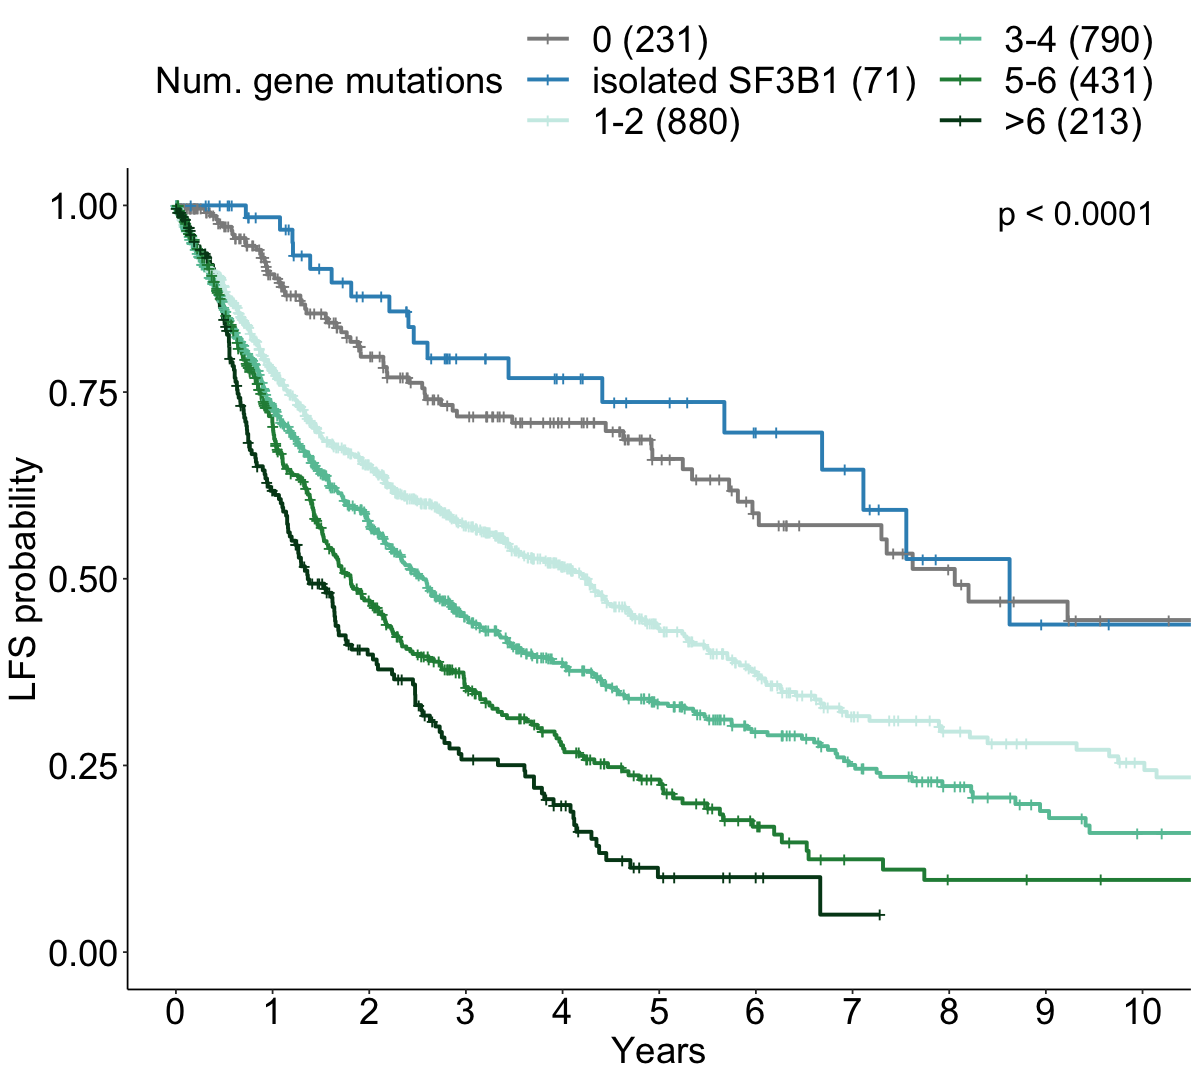

In [423]:
# LFS
#c("#2b8cbe","#df65b0")
nncol <- c(
"grey55",
"#3690c0",
#pal_uchicago()(1)
"#ccece6",
#"#99d8c9",
"#66c2a4",
#"#41ae76",
"#238b45",
#"#006d2c",
"#00441b"    
)
look <- "range_mut3"

ff.free = as.formula(paste("Surv(free_os_sample_years,free_os_status)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata))," (",km.free$n,")")
gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look, 
                   legend.labs=myleg.free, 
                   legend.title="Num. gene mutations",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=FALSE
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
#scale_color_igv() +
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

options(repr.plot.width=10, repr.plot.height=9)
gfree
ggsave(gfree, file="figures/vi/outline/noncKM-gene.png",width=10,height=9)
ggsave(gfree, file="figures/vi/outline/noncKM-gene.pdf",width=10,height=9)

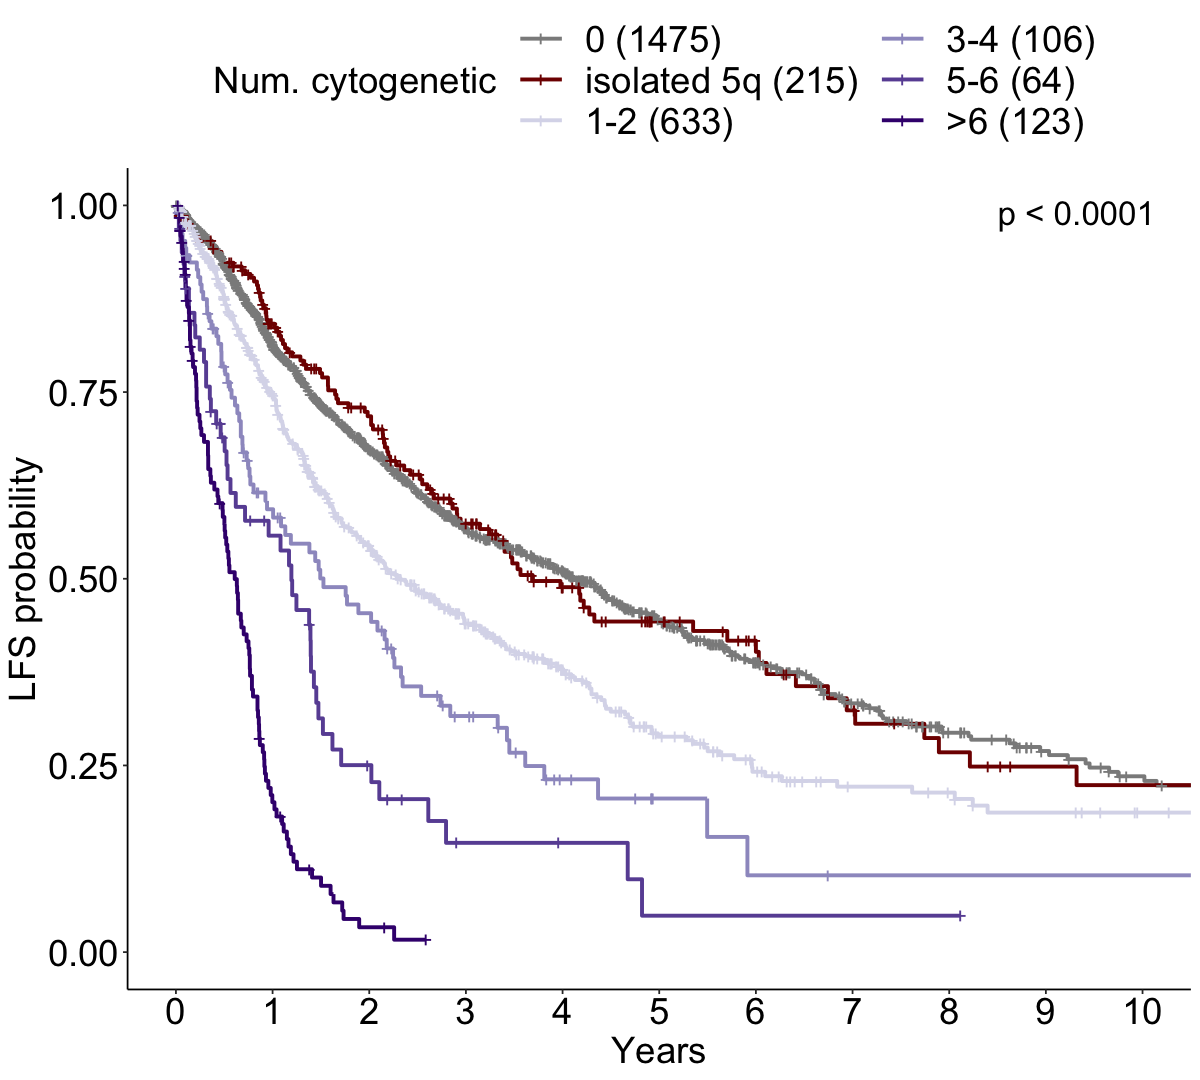

In [424]:
# LFS
nncol <- c(
"grey55",
#"#3690c0",
pal_uchicago()(1),
"#dadaeb", 
"#9e9ac8",
"#6a51a3",
"#3f007d"      
)
look <- "range_cyto3"

ff.free = as.formula(paste("Surv(free_os_sample_years,free_os_status)~",look))
km.free = survfit(ff.free ,data=aa) ; km.free$call$formula <- ff.free
myleg.free = paste0(gsub(paste0(look,"="),"",names(km.free$strata))," (",km.free$n,")")
gall.free <- ggsurvplot(km.free, data=aa, 
                   color=look, 
                   legend.labs=myleg.free, 
                   legend.title="Num. cytogenetic",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8.5, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   palette=nncol,
                   risk.table=FALSE
)
gfree <- gall.free$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("LFS probability") + 
#scale_color_igv() +
guides(color = guide_legend(override.aes = list(shape = NA))) + 
guides(color=guide_legend(nrow=3)) + 
theme(legend.key.size = unit(1.7, 'lines'))

options(repr.plot.width=10, repr.plot.height=9)
gfree
ggsave(gfree, file="figures/vi/outline/noncKM-cyto.png",width=10,height=9)
ggsave(gfree, file="figures/vi/outline/noncKM-cyto.pdf",width=10,height=9)

# Misc

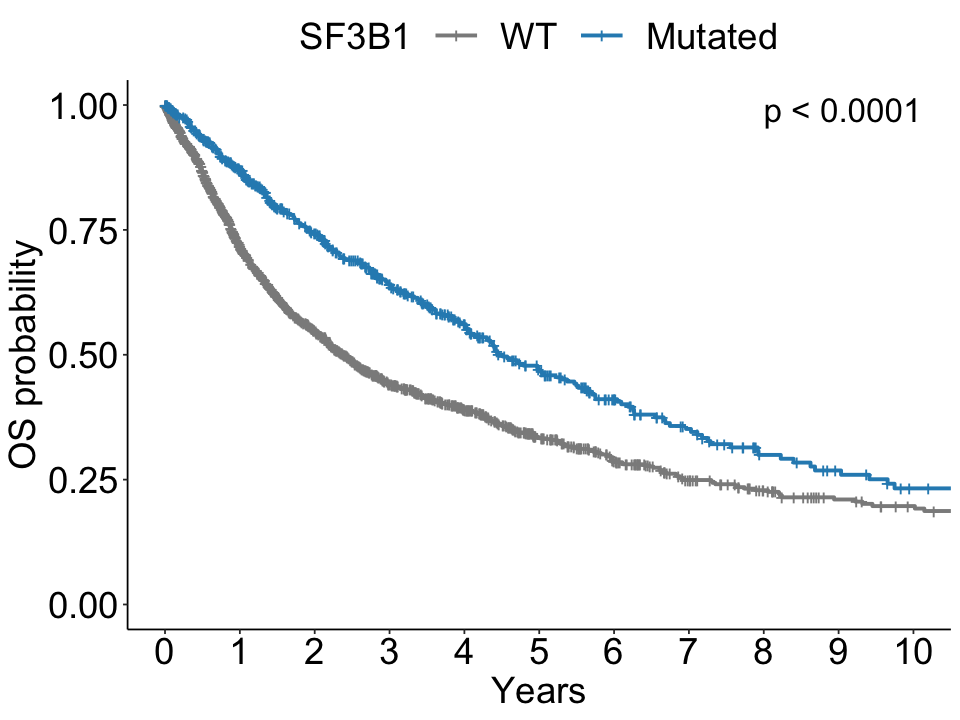

In [425]:
ff = as.formula(paste("Surv(free_os_sample_years,free_os_status)~","SF3B1"))
km = survfit(ff ,data=dd.restrict.free) ; km$call$formula <- ff
myleg = paste0(gsub(paste0("SF3B1","="),"",names(km$strata))," (",km$n,")")
gall <- ggsurvplot(km, data=dd.restrict.free, 
                   #color=SF3B1, 
                   legend.labs=myleg, 
                   legend.title="N",
                   size=1.1, conf.int=F,
                   xlim=c(0,10), break.time.by=1, 
                   pval=T, pval.coord=c(8, 0.99), pval.size=7,
                   #surv.median.line="hv",
                   #palette=nncol,
                   risk.table=FALSE
)

options(repr.plot.width=8, repr.plot.height=6)
gall$plot + theme_classic() + gtheme(22) + topleg + 
theme(legend.key.width = unit(1.1,"cm")) + xlab("Years") + ylab("OS probability") + 
scale_color_manual(name="SF3B1",labels=c("WT","Mutated"),values=c("grey55","#2b8cbe"))
#guides(color = guide_legend(override.aes = list(shape = NA))) + 
#guides(color=guide_legend(nrow=1)) + 
#theme(legend.key.size = unit(1.7, 'lines'))



In [426]:
table(dd.restrict.free$FLT3all)
32/2957


   0    1 
2925   32 

[1] 0.01082178

# VAFs

## General

In [427]:
gogv <- c(colnames(ddmut)[apply(dd.restrict.free[,colnames(ddmut)],2,sum)>=30])
gogv
dvaf <- maf[which(maf$GENE %in% c(gogv)),]

[1] "TET2"    "ASXL1"   "SF3B1"   "SRSF2"   "DNMT3A"  "RUNX1"   "TP53"   
 [8] "STAG2"   "U2AF1"   "EZH2"    "BCOR"    "CBL"     "ZRSR2"   "NRAS"   
[15] "IDH2"    "CUX1"    "NF1"     "KRAS"    "SETBP1"  "DDX41"   "PHF6"   
[22] "JAK2"    "MLL_PTD" "IDH1"    "PTPN11"  "ETV6"    "ETNK1"   "CEBPA"  
[29] "MPL"     "SH2B3"   "PPM1D"   "BRCC3"   "KMT2C"   "NPM1"    "BCORL1" 
[36] "GATA2"   "WT1"     "CTCF"    "PHIP"    "YLPM1"   "ZBTB33"  "EP300"  
[43] "GNB1"    "CSNK1A1" "ARID2"   "PRPF8"   "GNAS"    "KMT2D"

In [428]:
# SETBP1?
dvaf$classification <- "Other"
dvaf$classification[dvaf$GENE %in% c("SF3B1","SRSF2","ZRSR2","U2AF1","PRPF8")] <- "Splicing"
dvaf$classification[dvaf$GENE %in% c("DNMT3A","TET2","IDH2","IDH1")] <- "DNA Methylation"
dvaf$classification[dvaf$GENE %in% c("ASXL1","EZH2","BCOR","BCORL1","PHF6","KMT2C","ASXL2","KDM6A","EP300","ARID2","SETBP1","KMT2D")] <- "Chromatin Regulator"
dvaf$classification[dvaf$GENE %in% c("RUNX1","CUX1","ETV6","CEBPA","ZBTB33","NPM1","WT1","GATA2")] <- "Transcription Factor"
dvaf$classification[dvaf$GENE %in% c("NRAS","KRAS","CBL","PTPN11","NF1","JAK2","CALR","ETNK1","MPL","KIT","CSF3R","FLT3","SH2B3","GNAS","GNB1","CSNK1A1")] <- "Signaling"
dvaf$classification[dvaf$GENE %in% c("TP53","PPM1D","BRCC3")] <- "DNA Repair"
dvaf$classification[dvaf$GENE %in% c("STAG2","RAD21","SMC1A","SMC3","CTCF")] <- "Cohesin"
dvaf$classification <- factor(dvaf$classification, levels=c("Splicing","DNA Methylation","Chromatin Regulator","DNA Repair","Transcription Factor","Cohesin","Signaling","Other"))
#dvaf$misc <- "lala"
#dvaf$misc[dvaf$classification%in%c("Transcription Factor","Cohesin","Signalling","Other")] <- "lolo"
table(dvaf$classification)


            Splicing      DNA Methylation  Chromatin Regulator 
                1686                 2220                 1624 
          DNA Repair Transcription Factor              Cohesin 
                 532                  898                  374 
           Signaling                Other 
                 925                  141 

In [429]:
io <- order(sapply(unique(dvaf$GENE), function(x) median(dvaf$VAF[dvaf$GENE==x])))
dvaf$GENE <- factor(dvaf$GENE, levels=unique(dvaf$GENE)[rev(io)])

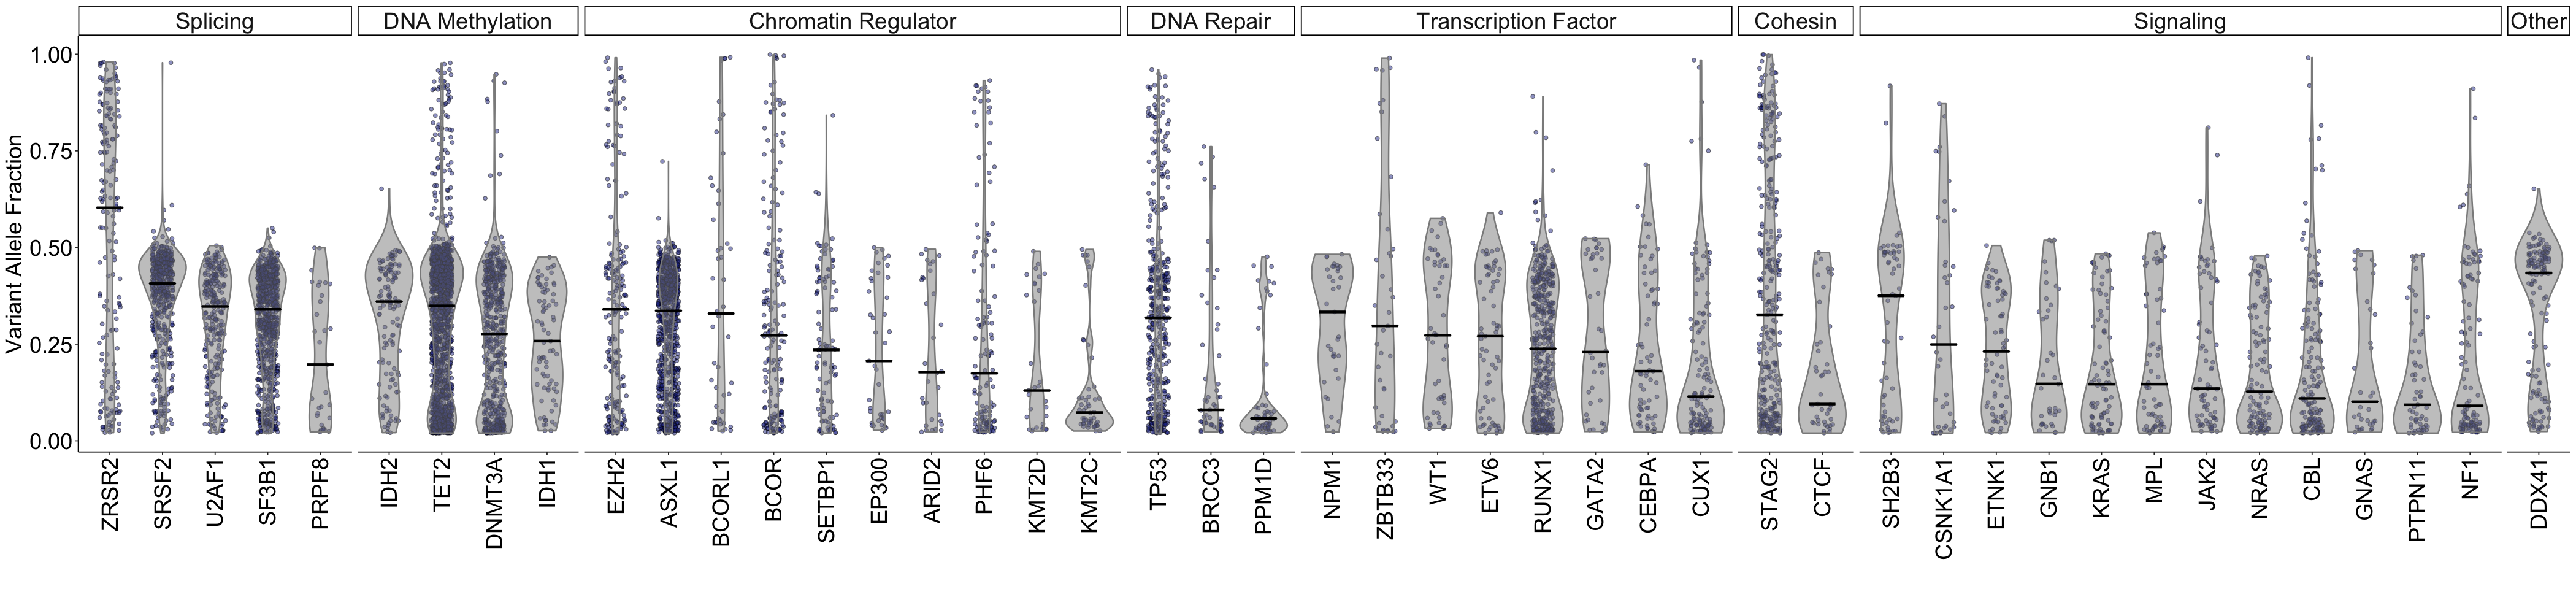

In [430]:
options(repr.plot.width=35, repr.plot.height=8)

gvaf <- ggplot(dvaf,aes(y=VAF, x=GENE,fill="all")) +
geom_point(pch = 21, position = position_jitterdodge(), alpha=.5) + theme_classic() + gtheme(22) + 
geom_violin(fill="grey55", alpha=0.5,
            colour = "grey55", size = .7) + 
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5) + 
#geom_boxplot(width=.3) + 
scale_fill_manual(values="#253494") +
facet_grid(.~classification, scales = "free", space="free_x") +
#facet_wrap(misc~classification, scales = "free") + #, space="free") +
noleg + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
ylab("Variant Allele Fraction") + xlab("")
gvaf

ggsave(gvaf, file="figures/vi/outline/vaf.png", width=35, height=8)
ggsave(gvaf, file="figures/vi/outline/vaf.pdf", width=35, height=8)

In [351]:
options(repr.plot.width=35, repr.plot.height=8)
if (1==0) {
ggplot(dvaf,aes(y=VAF, x=GENE,fill=classification)) +
geom_point(pch = 21, position = position_jitterdodge(), alpha=.5) + theme_classic() + gtheme(18) + 
geom_violin(alpha=0.5,
            colour = "grey55", size = .7, width=2.1) + 
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median,
                 geom = "crossbar", width = 0.5) + 
#geom_boxplot(width=.3) + 
scale_fill_jama() +
#facet_grid(.~classification, scales = "free", space="free_x") +
#facet_wrap(misc~classification, scales = "free") + #, space="free") +
topleg + angle45 +
ylab("Variant Allele Fraction") + xlab("")
}

# Centers